In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the data

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/fundamentals.csv')

# Display the first few rows to inspect the data
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0

# Checking the Data and data info

In [3]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# List all columns to identify the ones we need
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Ticker Symbol', 'Period Ending', 'Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders', 'Net Income-Cont. Operations', 'N

In [4]:
# Check for missing values
df.isnull().sum()

Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 78, dtype: int64

In [5]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [6]:
# Get summary statistics of numerical columns
df.describe()

Accounts Payable  Accounts Receivable  Add'l income/expense items  \
count      1.781000e+03         1.781000e+03                1.781000e+03   
mean       4.673418e+09        -6.353484e+07                6.908940e+07   
std        1.406047e+10         7.562794e+08                6.848143e+08   
min        0.000000e+00        -6.452000e+09               -6.768000e+09   
25%        5.160000e+08        -1.040000e+08               -2.638000e+06   
50%        1.334000e+09        -1.830000e+07                2.000000e+06   
75%        3.246000e+09         7.816000e+06                3.359200e+07   
max        2.069390e+11         2.266400e+10                1.416200e+10   

       After Tax ROE  Capital Expenditures  Capital Surplus   Cash Ratio  \
count    1781.000000          1.781000e+03     1.781000e+03  1482.000000   
mean       43.601348         -1.251925e+09     5.351784e+09    74.457490   
std       233.924028          2.979963e+09     1.133977e+10   102.298374   
min         0.000000         -3.798500e+10    -7.215000e+08     0.000000   
25%        10.000000         -1.151200e+09     4.791000e+08    17.000000   
50%        16.000000         -3.580000e+08     1.997080e+09    41.000000   
75%        26.000000         -1.291000e+08     5.735000e+09    90.000000   
max      5789.000000          5.000000e+06     1.082880e+11  1041.000000   

       Cash and Cash Equivalents  Changes in Inventories  Common Stocks  ...  \
count               1.781000e+03            1.781000e+03   1.781000e+03  ...   
mean                8.521399e+09           -6.787749e+07   1.608543e+09  ...   
std                 5.432105e+10            3.903369e+08   9.177636e+09  ...   
min                 2.100000e+04           -5.562000e+09   0.000000e+00  ...   
25%                 3.088000e+08           -5.400000e+07   1.628000e+06  ...   
50%                 8.625900e+08            0.000000e+00   7.725000e+06  ...   
75%                 2.310000e+09            0.000000e+00   2.970000e+08  ...   
max                 7.281110e+11            3.755000e+09   1.581420e+11  ...   

       Total Current Assets  Total Current Liabilities  Total Equity  \
count          1.781000e+03               1.781000e+03  1.781000e+03   
mean           6.726349e+09               4.699919e+09  1.188846e+10   
std            1.344800e+10               9.538832e+09  2.584429e+10   
min            0.000000e+00               0.000000e+00 -1.324400e+10   
25%            1.044178e+09               5.640760e+08  2.201492e+09   
50%            2.747200e+09               1.701500e+09  4.983000e+09   
75%            6.162000e+09               4.381000e+09  1.080900e+10   
max            1.396600e+11               9.028100e+10  2.562050e+11   

       Total Liabilities  Total Liabilities & Equity  Total Revenue  \
count       1.781000e+03                1.781000e+03   1.781000e+03   
mean        4.380420e+10                5.569266e+10   2.029154e+10   
std         1.817039e+11                2.033612e+11   4.095355e+10   
min         2.577000e+06                2.705000e+06   1.514000e+06   
25%         3.843300e+09                6.552689e+09   3.714000e+09   
50%         9.141000e+09                1.517000e+10   8.023200e+09   
75%         2.389700e+10                3.599710e+10   1.748600e+10   
max         2.340547e+12                2.572274e+12   4.856510e+11   

       Treasury Stock     For Year  Earnings Per Share  \
count    1.781000e+03  1608.000000         1562.000000   
mean    -3.951522e+09  2013.305348            3.353707   
std      1.407047e+10    19.953135            4.695896   
min     -2.297340e+11  1215.000000          -61.200000   
25%     -3.040895e+09  2013.000000            1.590000   
50%     -3.068350e+08  2014.000000            2.810000   
75%      0.000000e+00  2015.000000            4.590000   
max      0.000000e+00  2016.000000           50.090000   

       Estimated Shares Outstanding  
count                  1.562000e+03  
mean                   6.024

In [7]:
# Check unique values for other columns that may be categorical
df.nunique()

Ticker Symbol                    448
Period Ending                    162
Accounts Payable                1676
Accounts Receivable             1329
Add'l income/expense items      1134
                                ... 
Total Revenue                   1757
Treasury Stock                  1015
For Year                           6
Earnings Per Share               744
Estimated Shares Outstanding    1558
Length: 78, dtype: int64

In [12]:
# Select numerical columns based on their data types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Display the list of numerical columns
print(numerical_cols)

['Accounts Payable', 'Accounts Receivable', "Add'l income/expense items", 'After Tax ROE', 'Capital Expenditures', 'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks', 'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation', 'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Effect of Exchange Rate', 'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets', 'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax', 'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments', 'Liabilities', 'Long-Term Debt', 'Long-Term Investments', 'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing', 'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders', 'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items', 'Operating Income',

# EDA

## Univariate Analysis for Numerical Columns

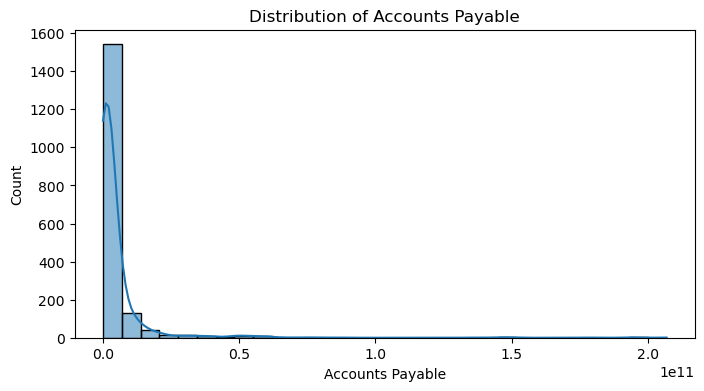

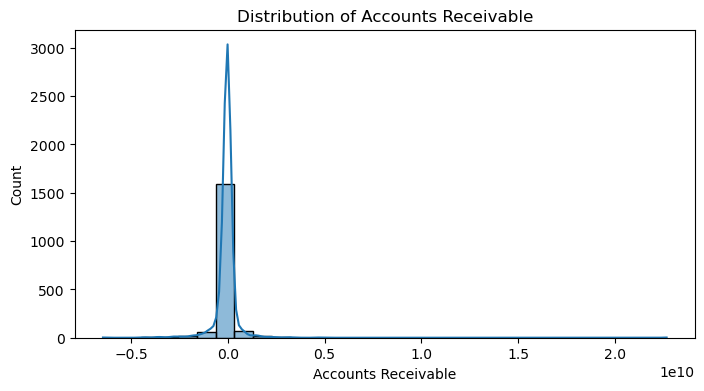

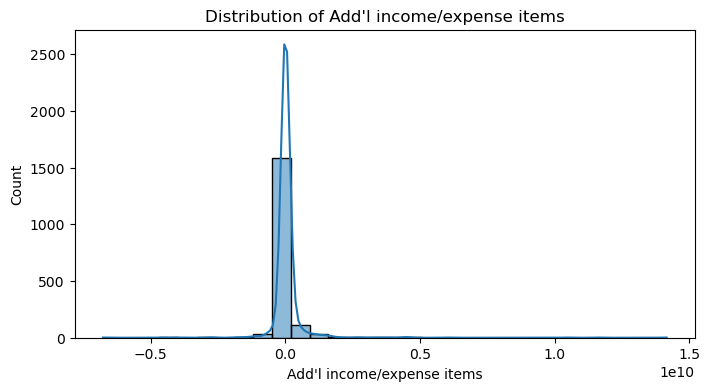

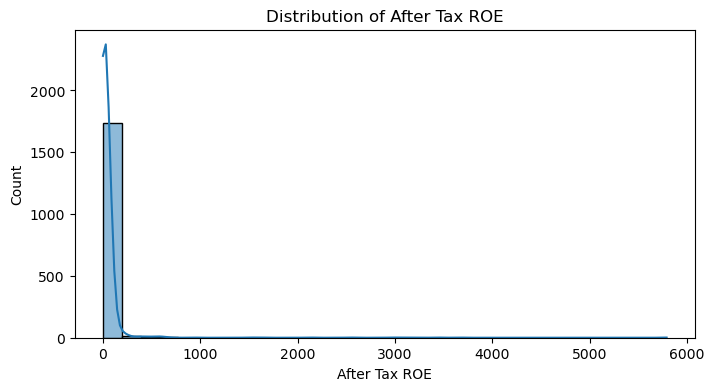

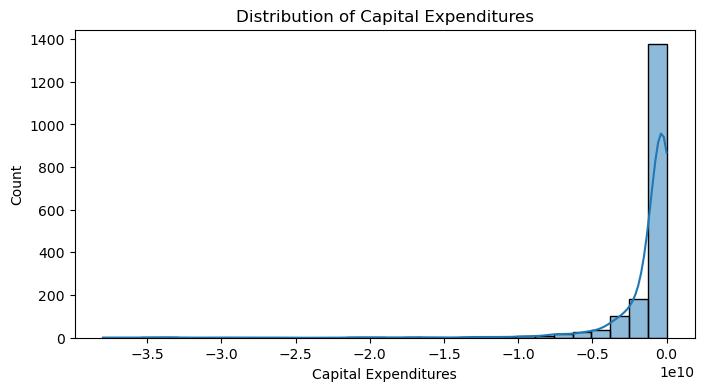

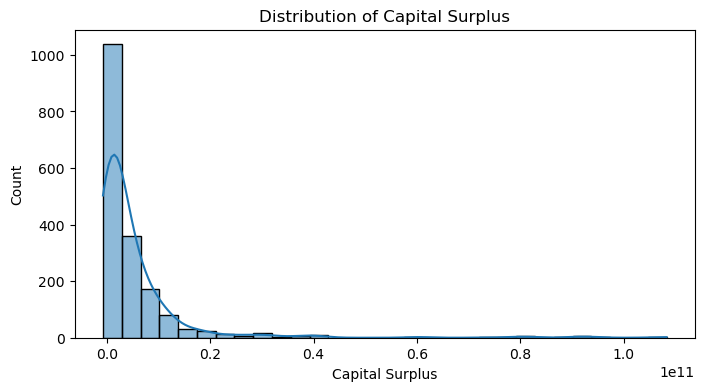

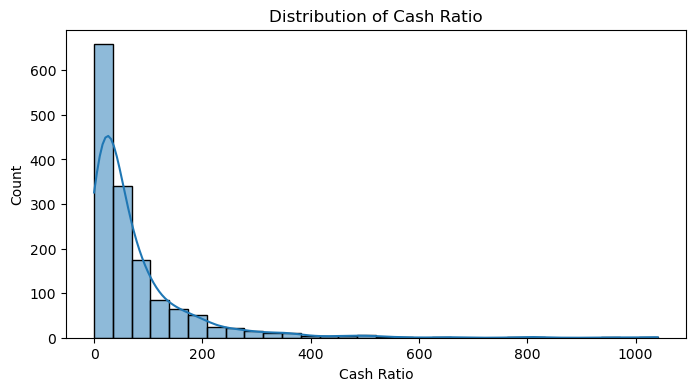

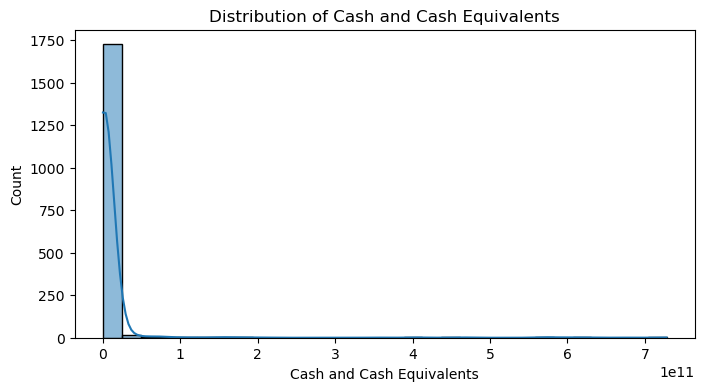

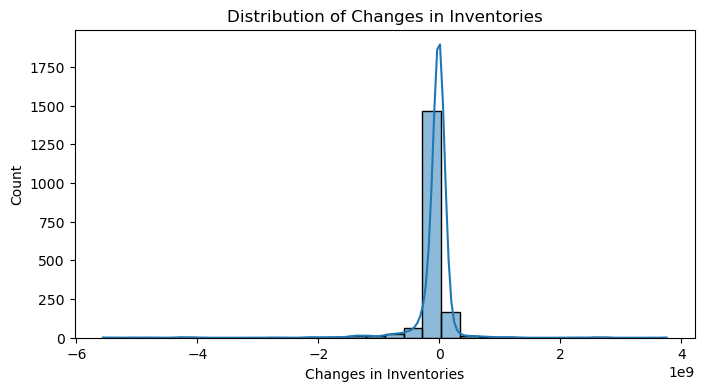

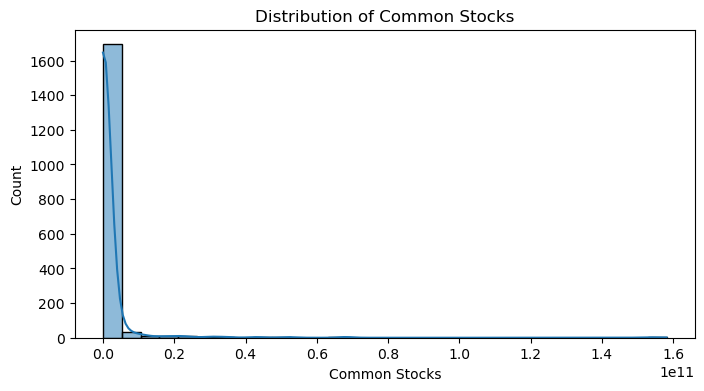

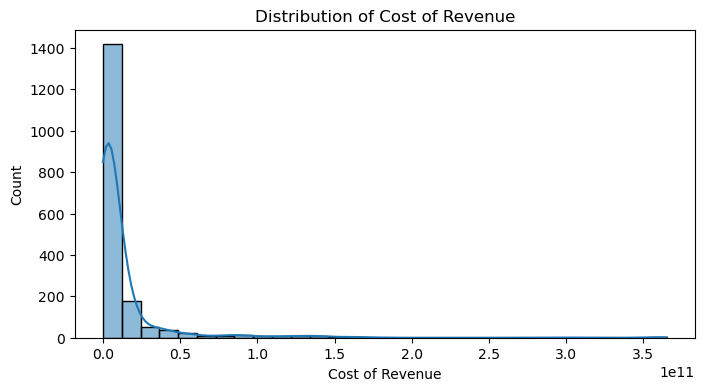

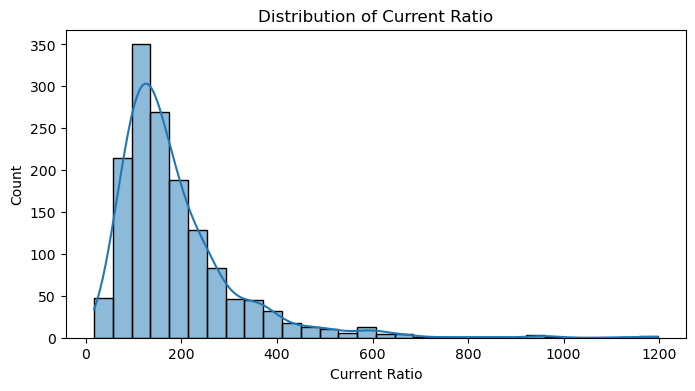

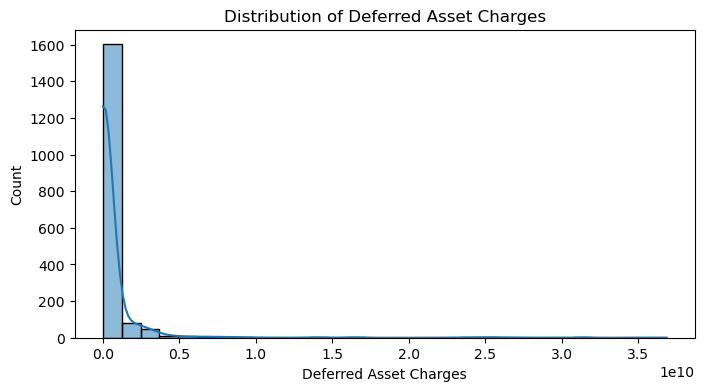

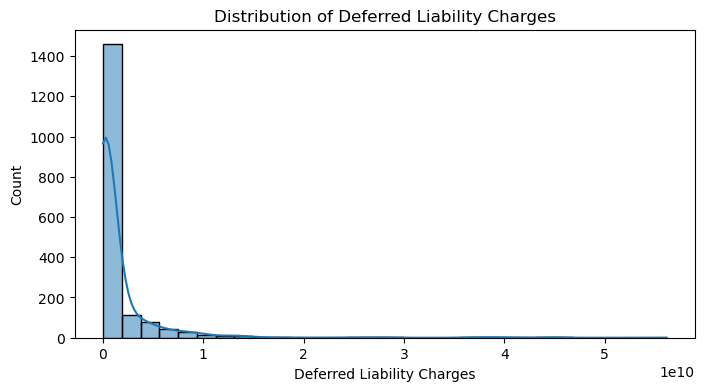

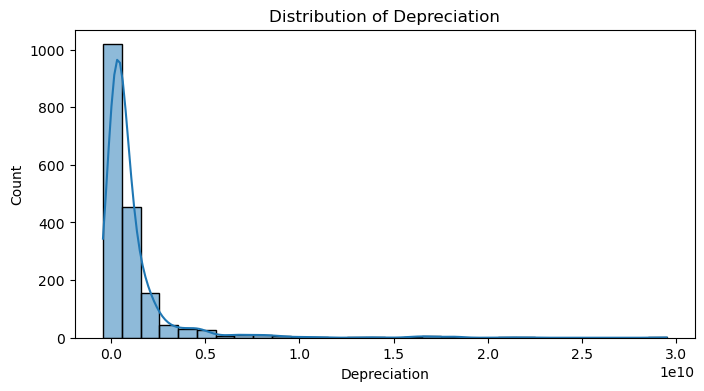

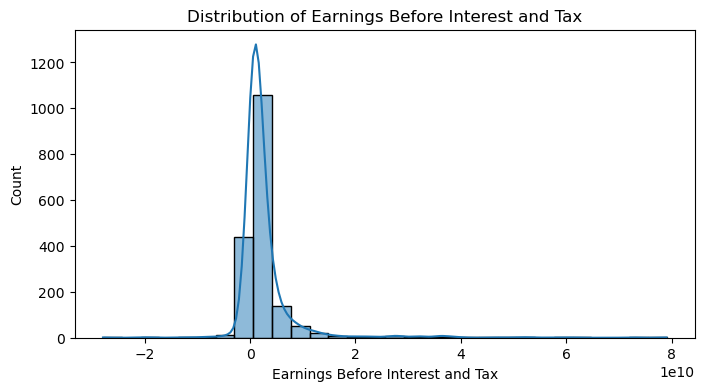

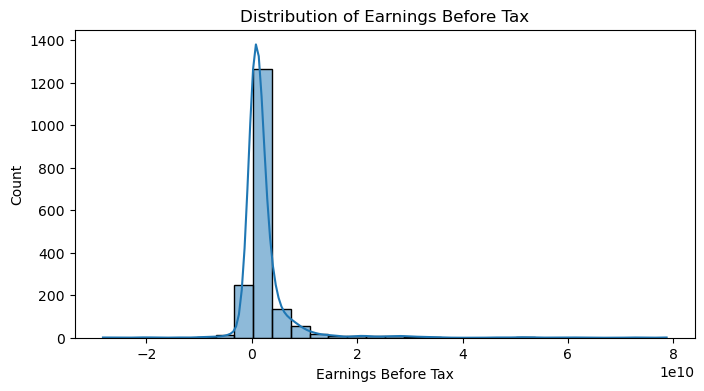

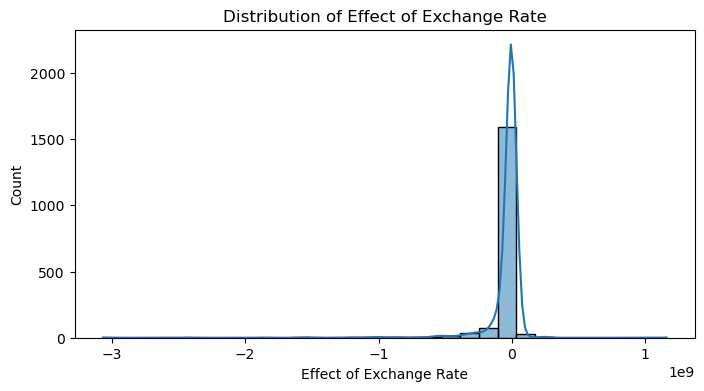

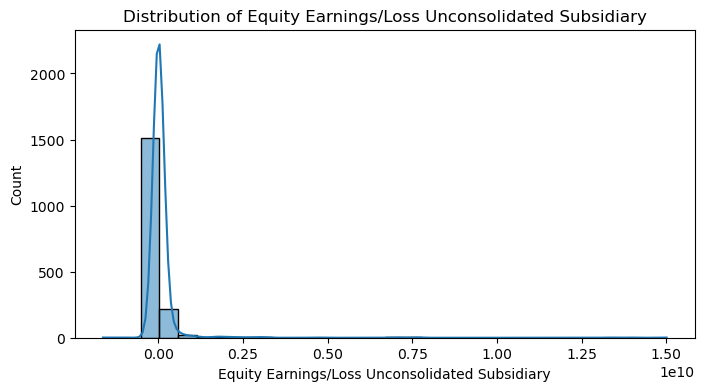

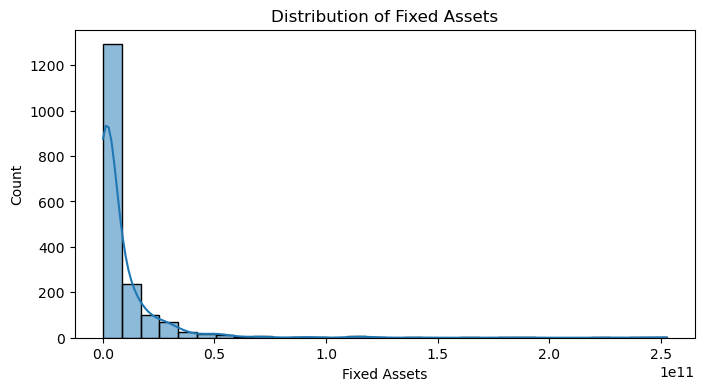

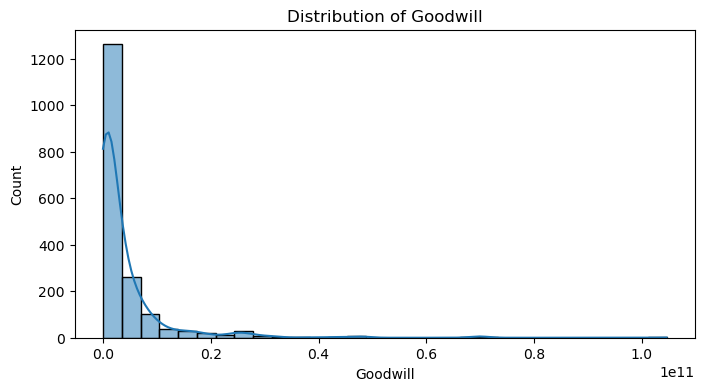

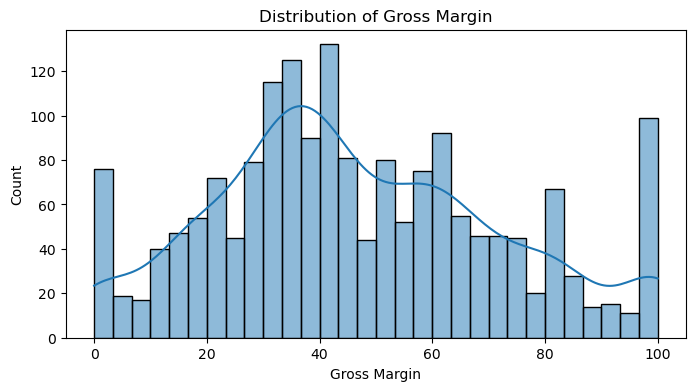

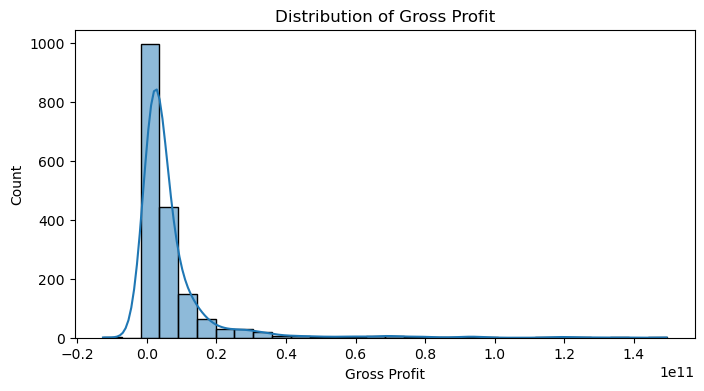

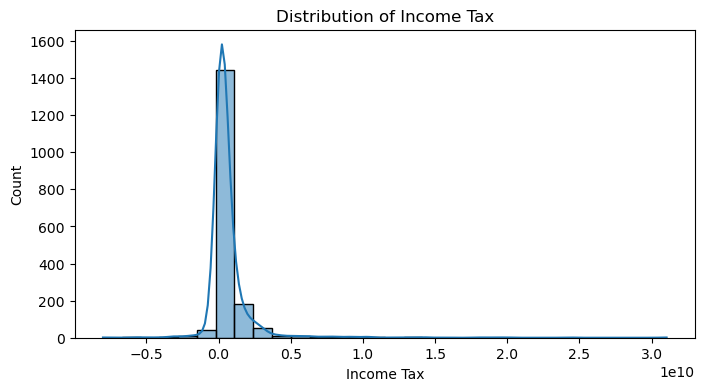

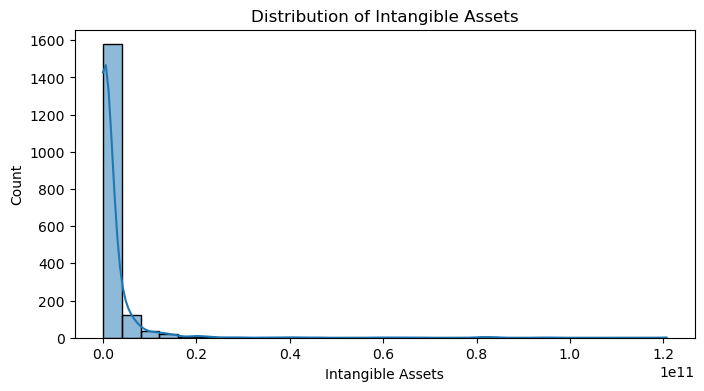

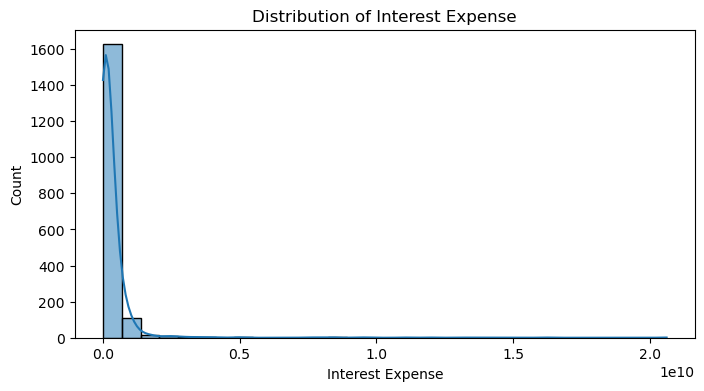

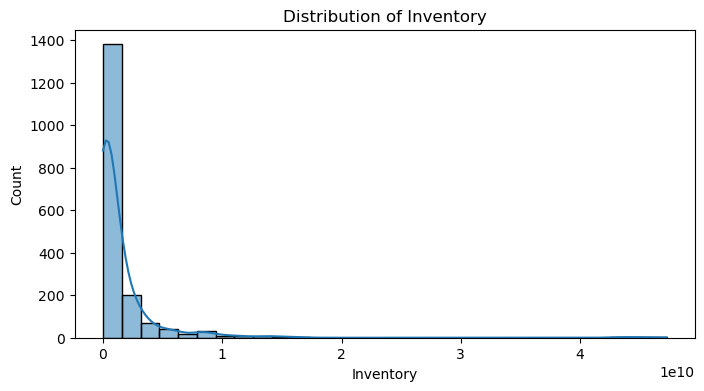

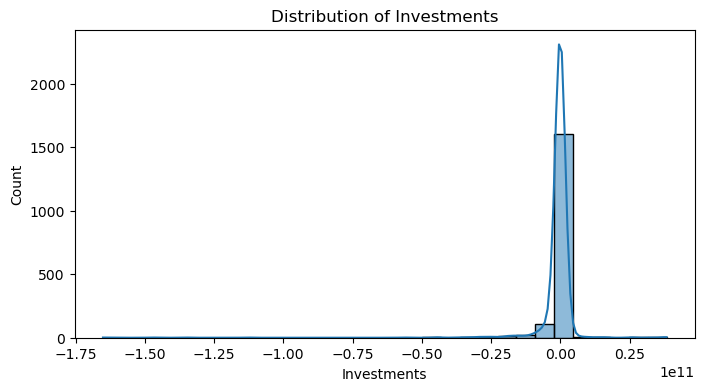

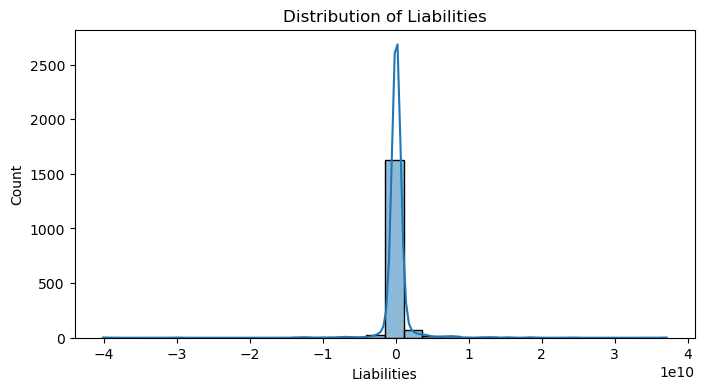

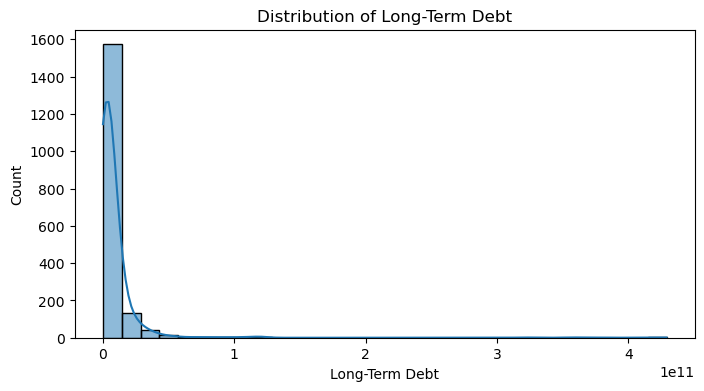

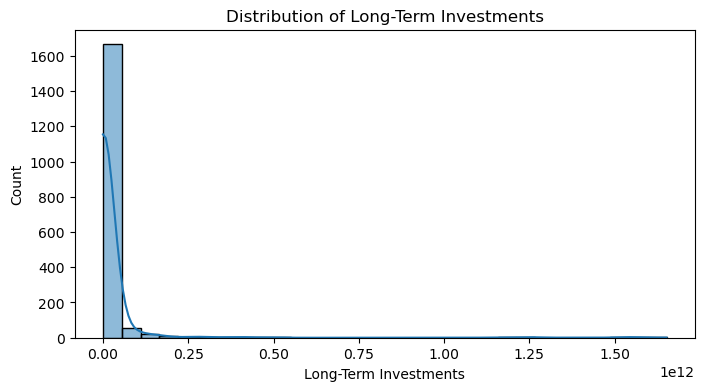

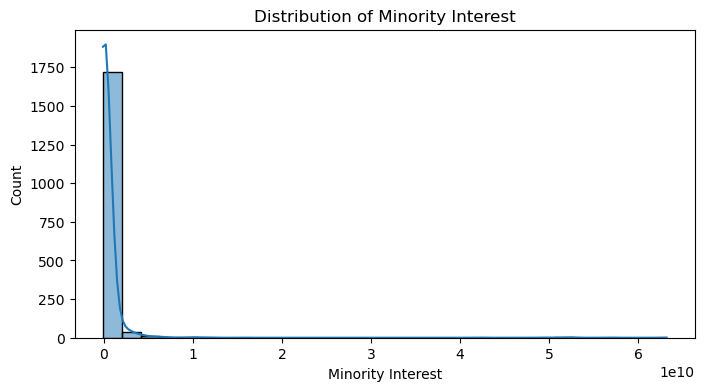

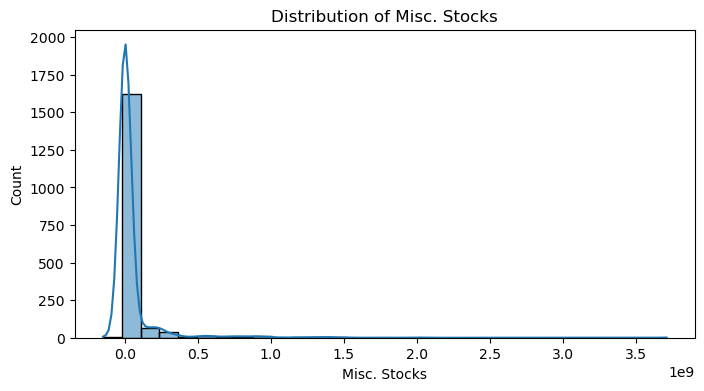

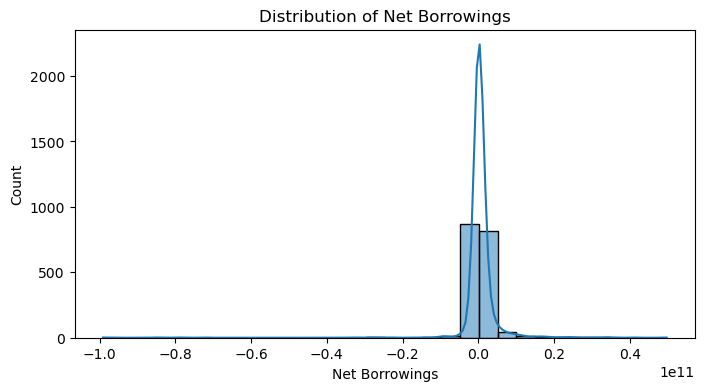

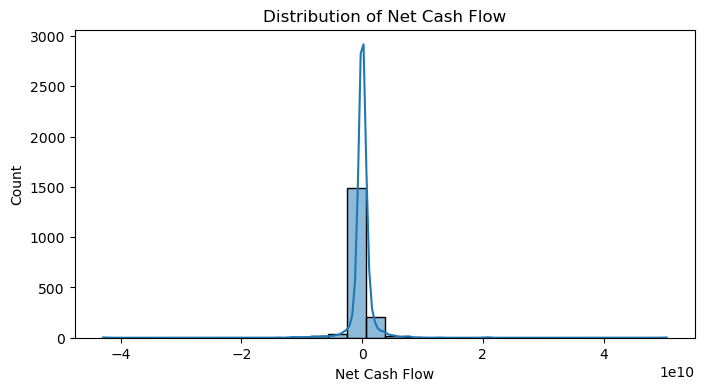

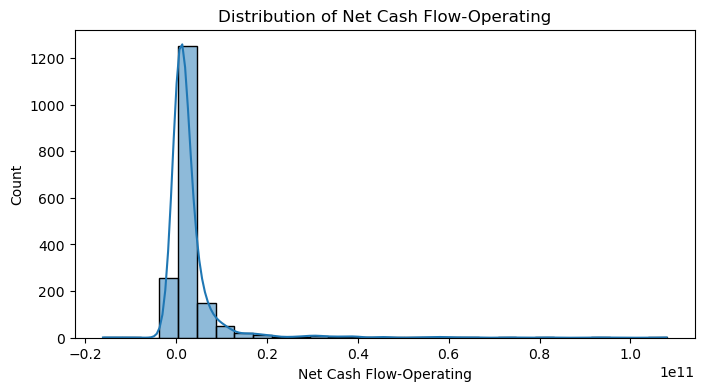

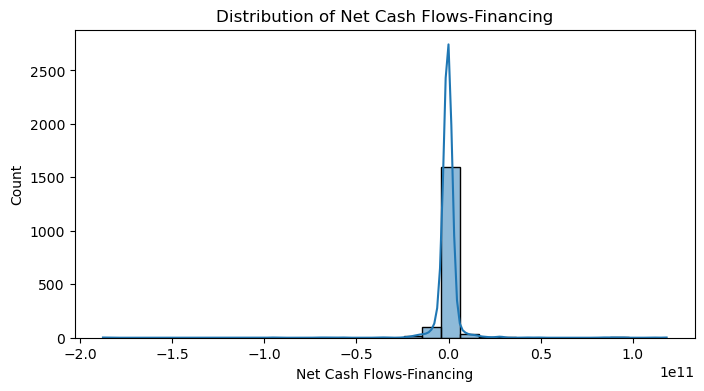

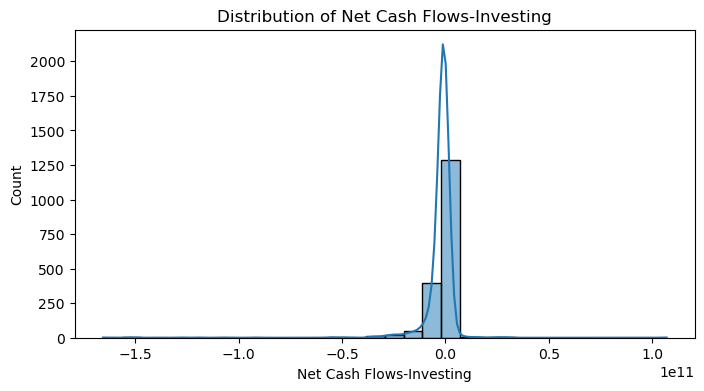

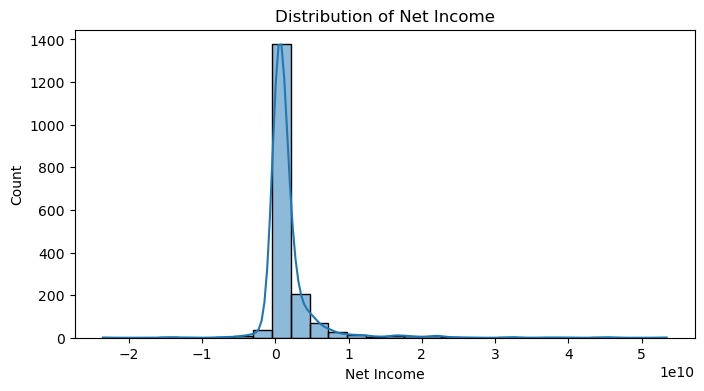

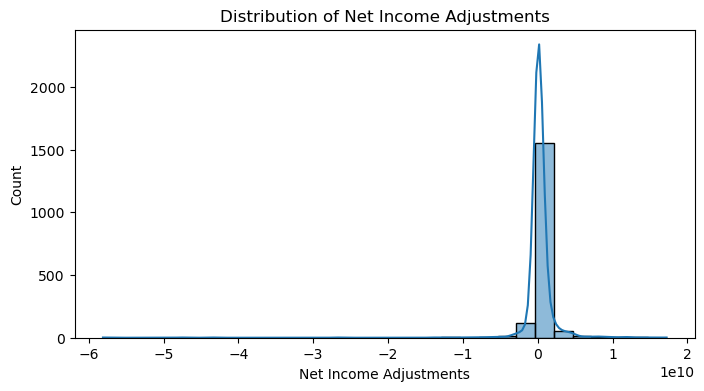

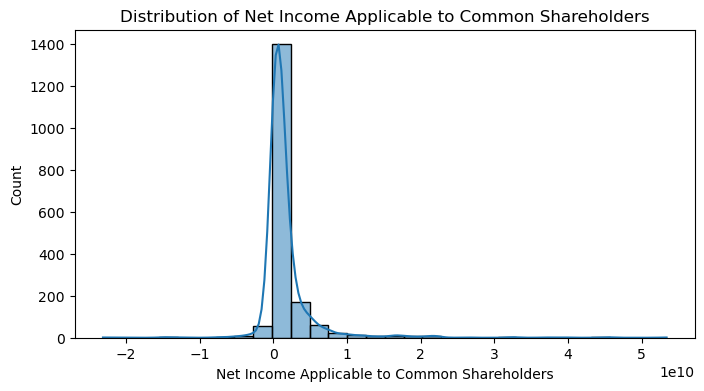

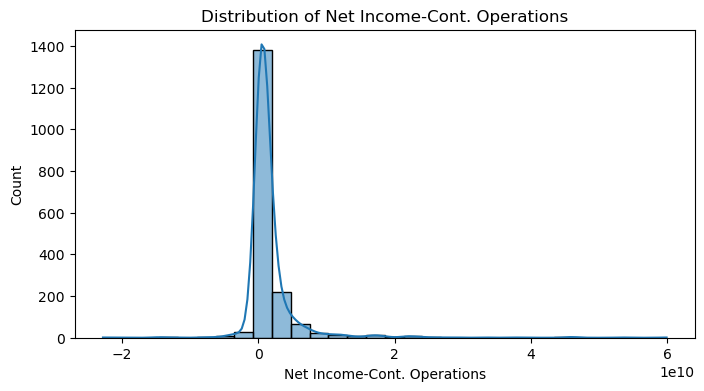

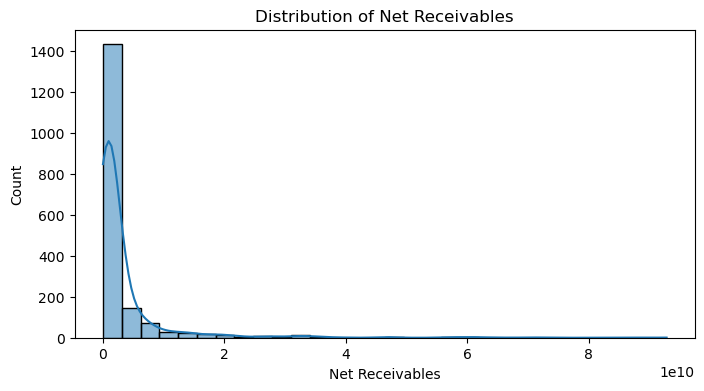

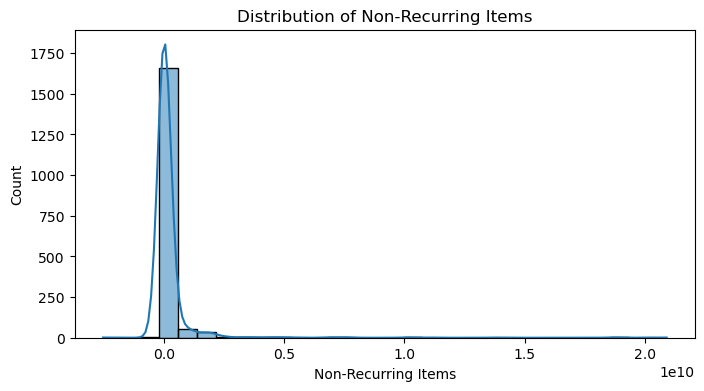

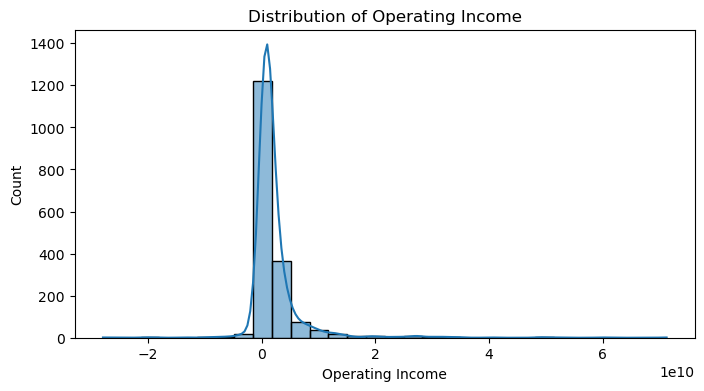

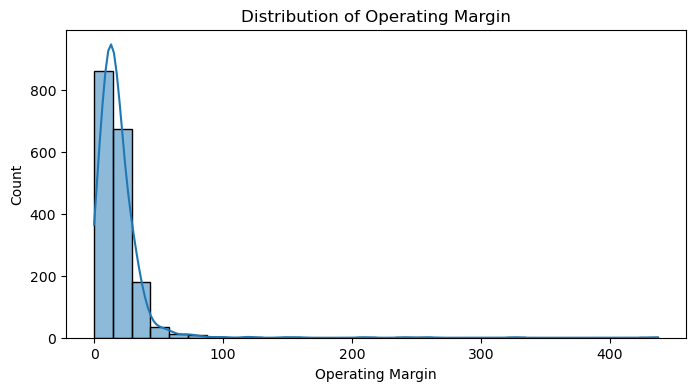

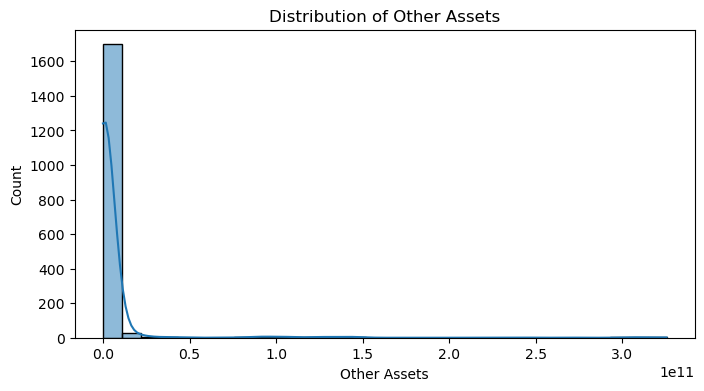

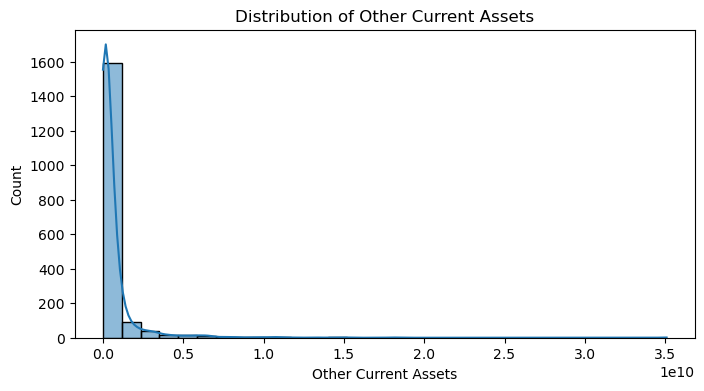

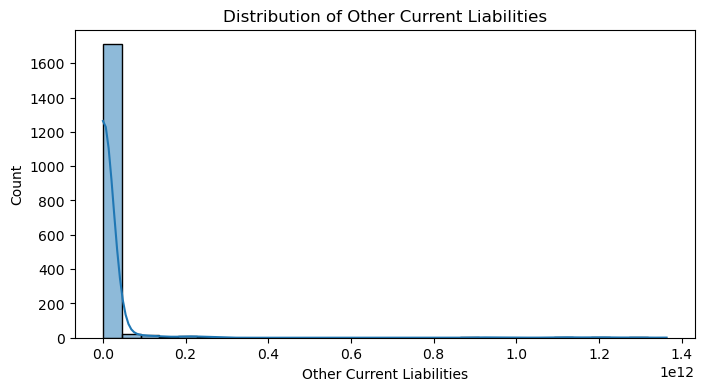

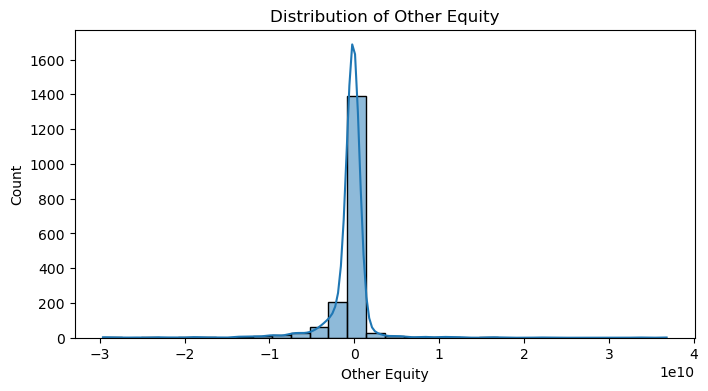

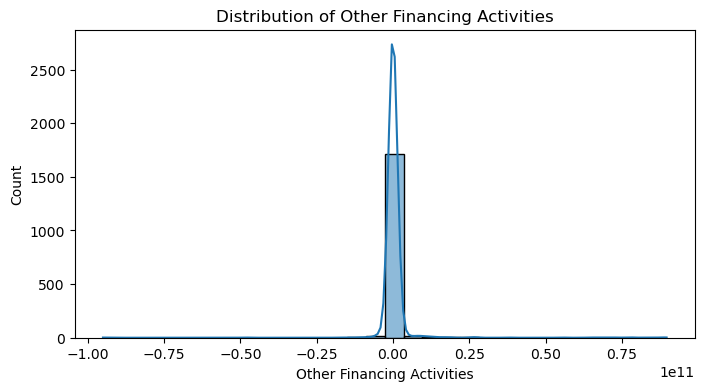

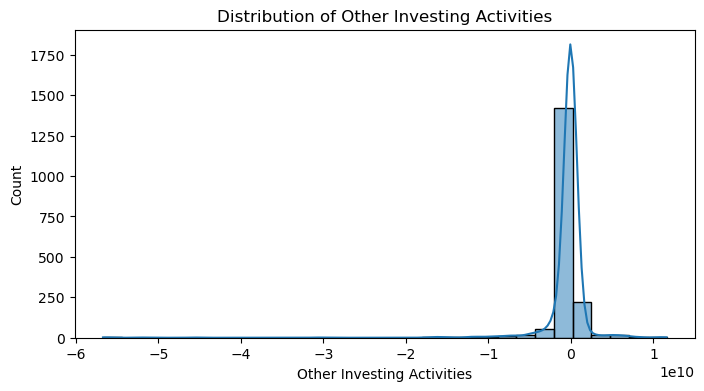

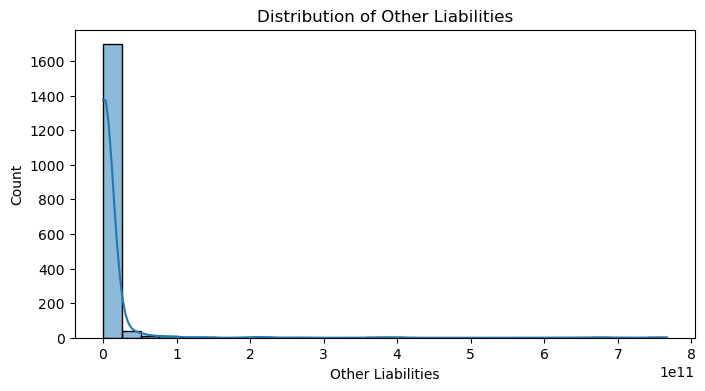

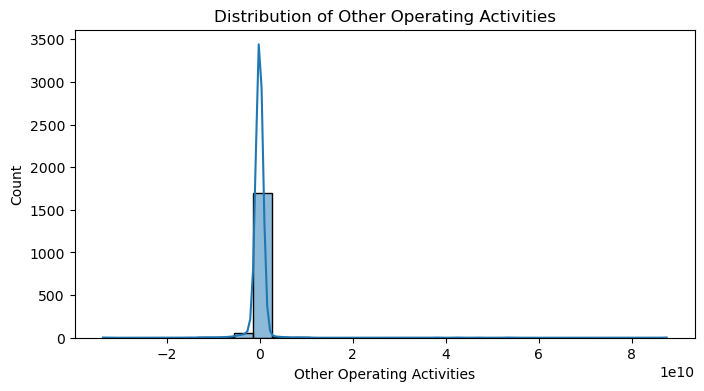

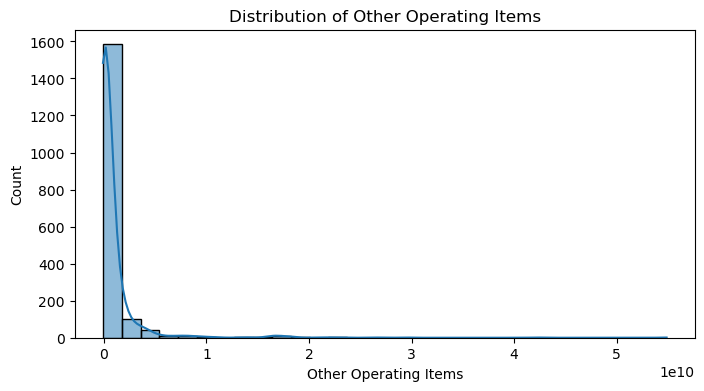

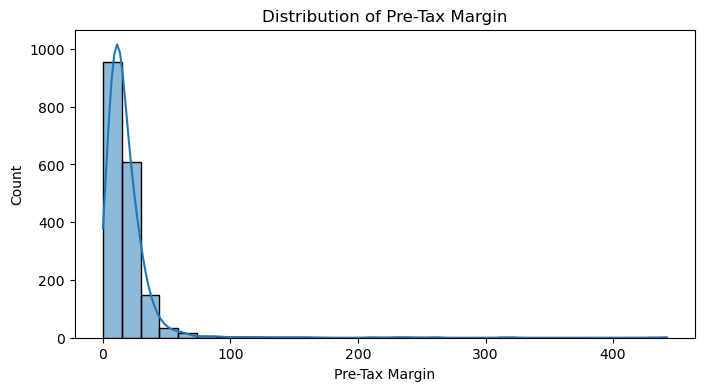

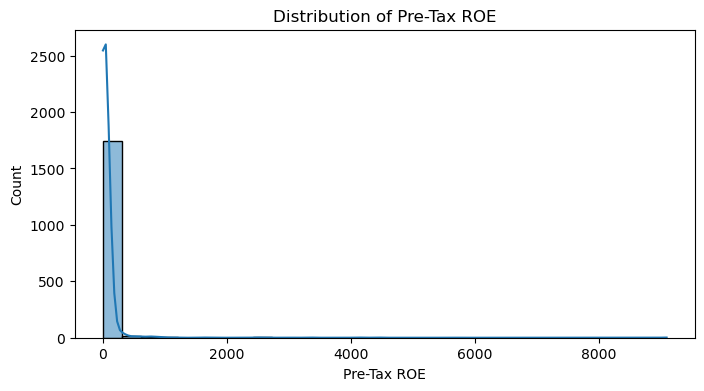

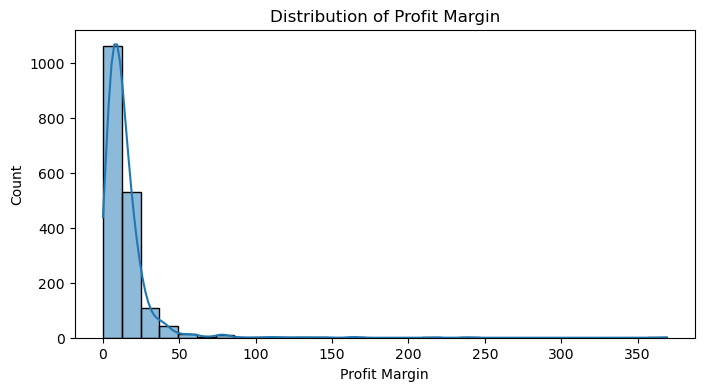

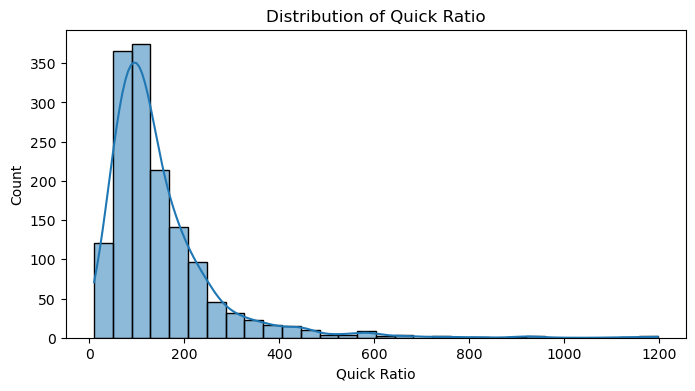

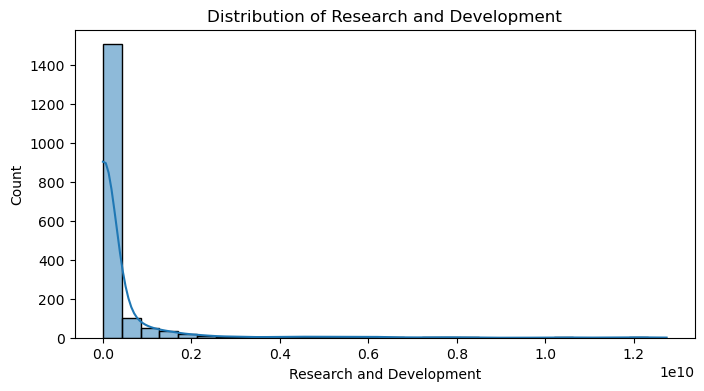

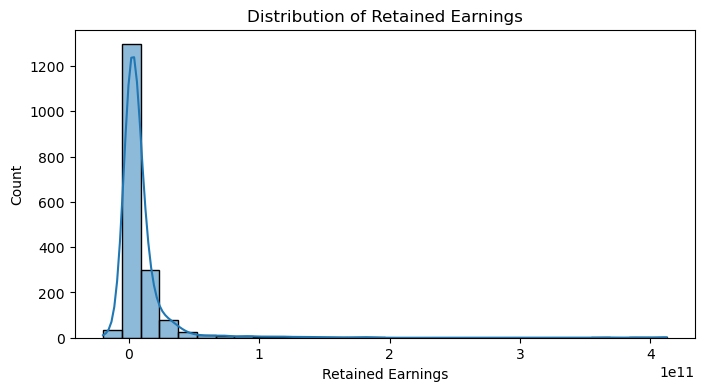

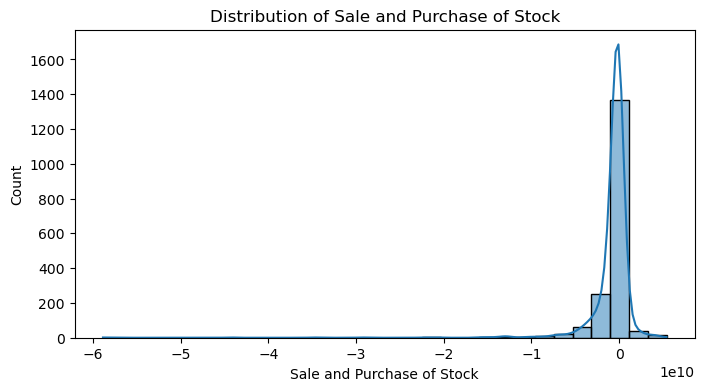

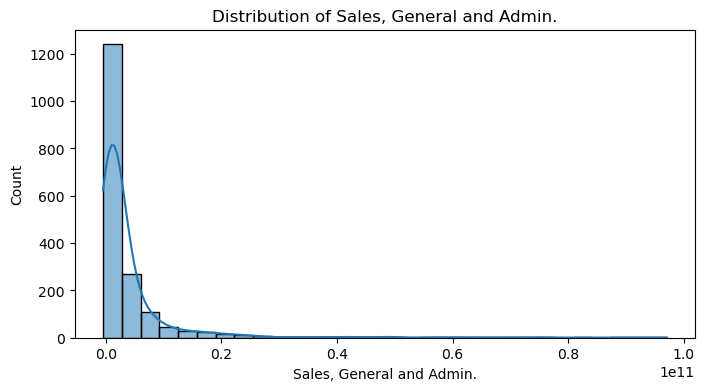

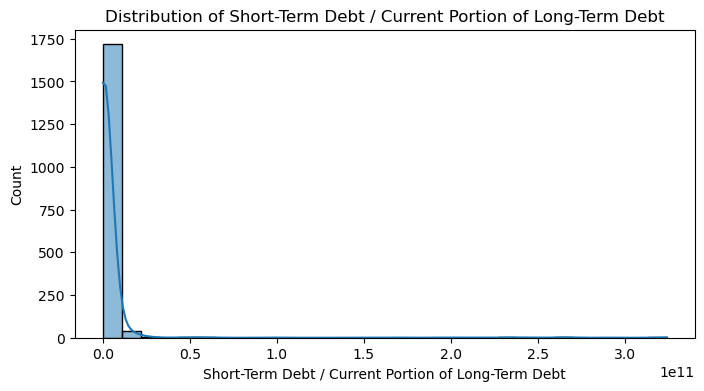

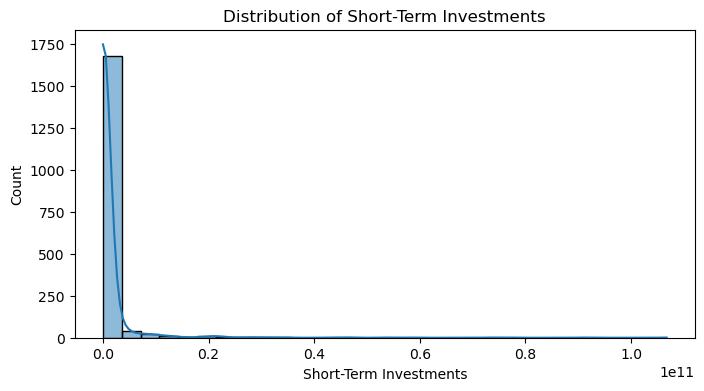

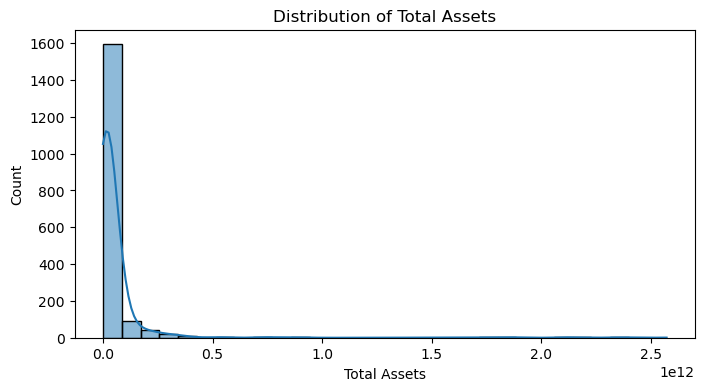

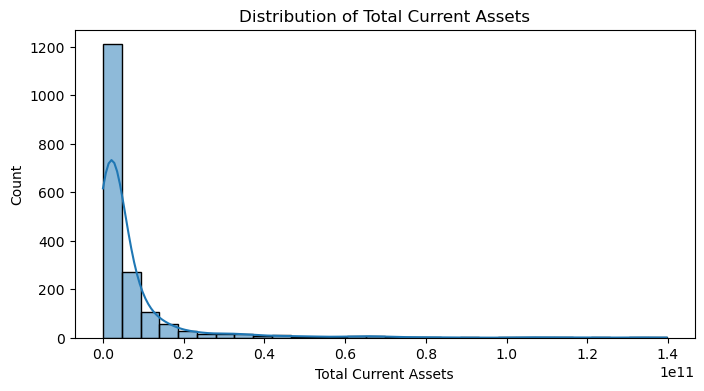

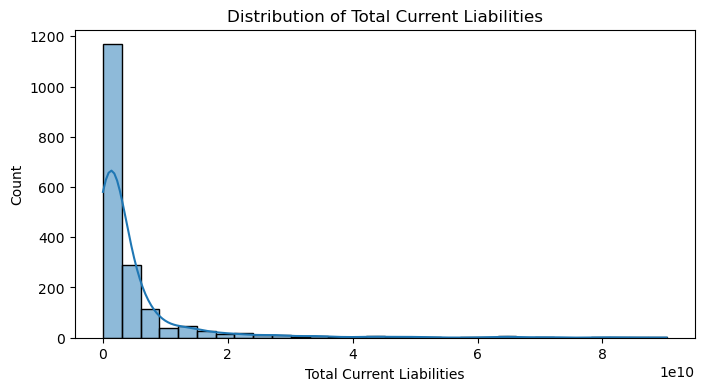

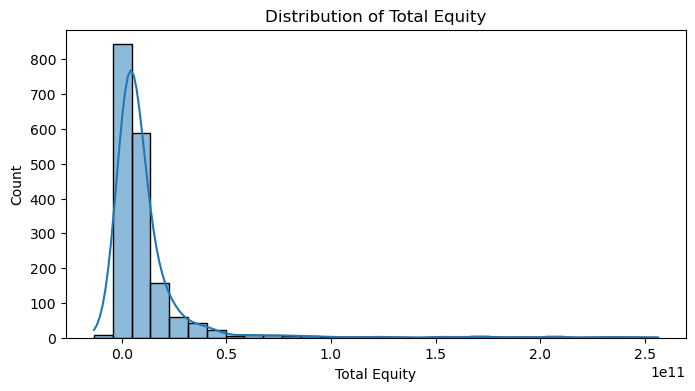

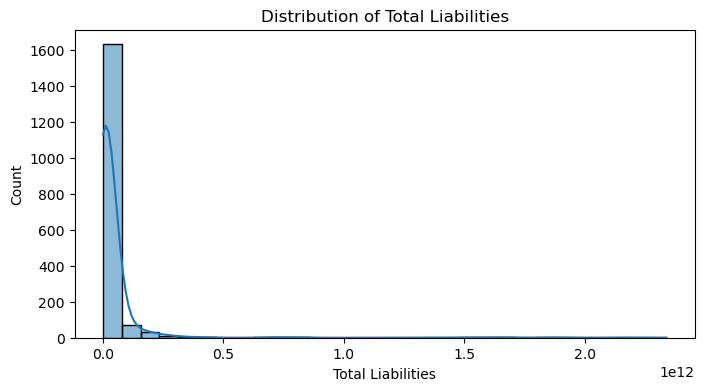

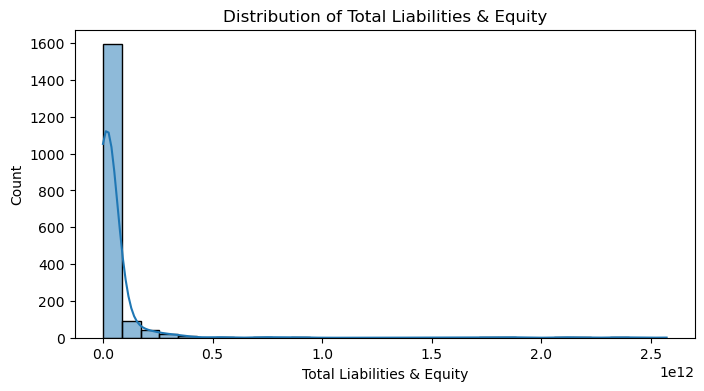

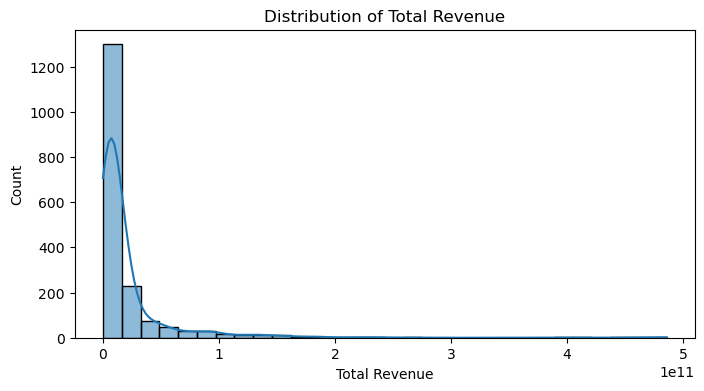

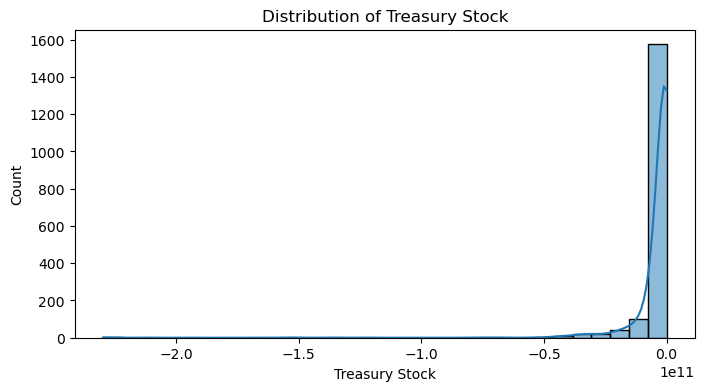

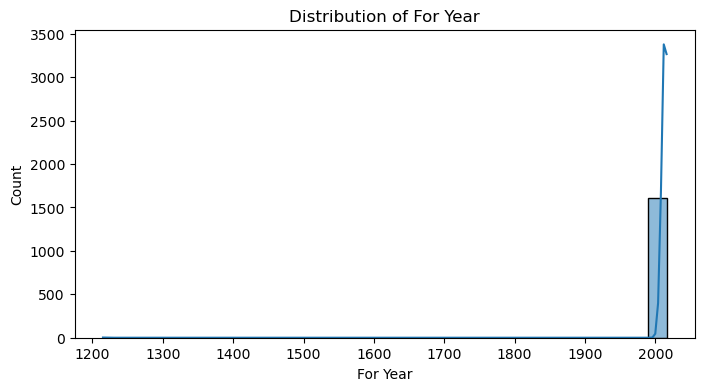

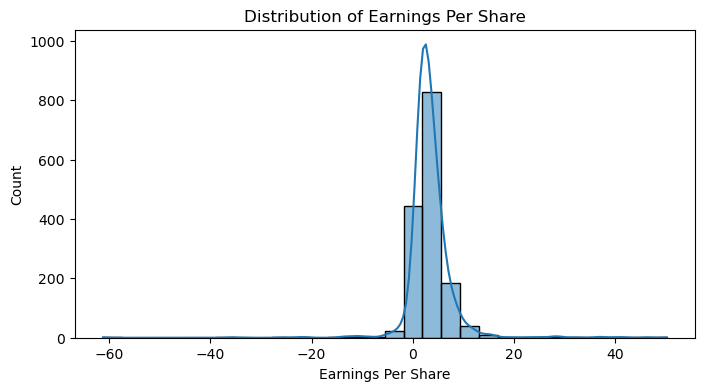

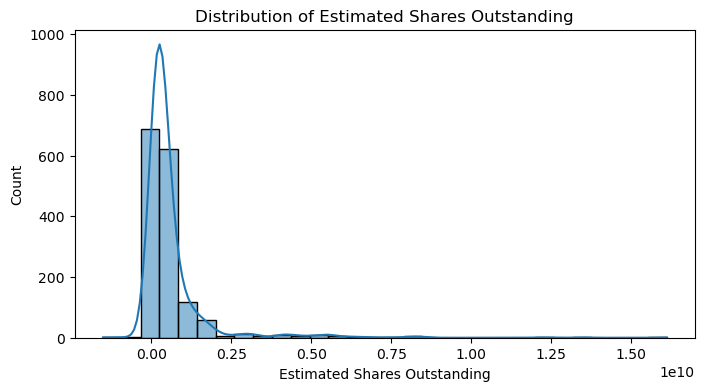

In [9]:
# For numerical columns like Accounts Payable, Accounts Receivable, ROE, etc., plot distributions or histograms
# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

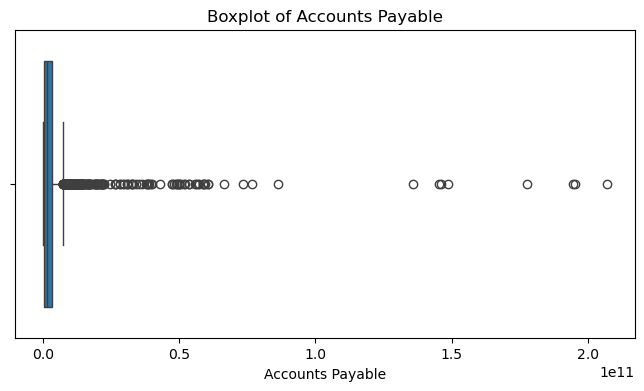

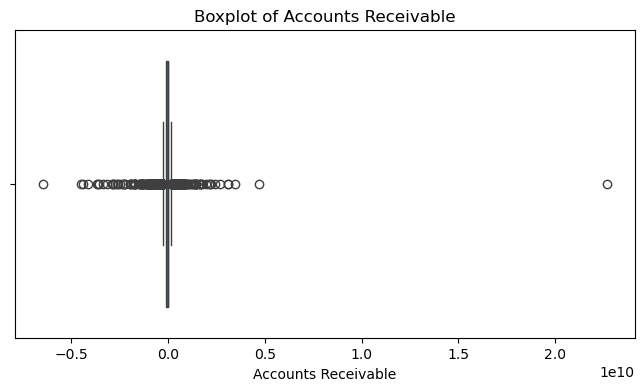

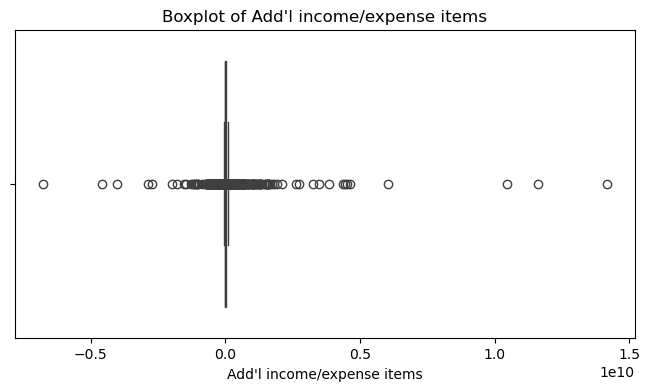

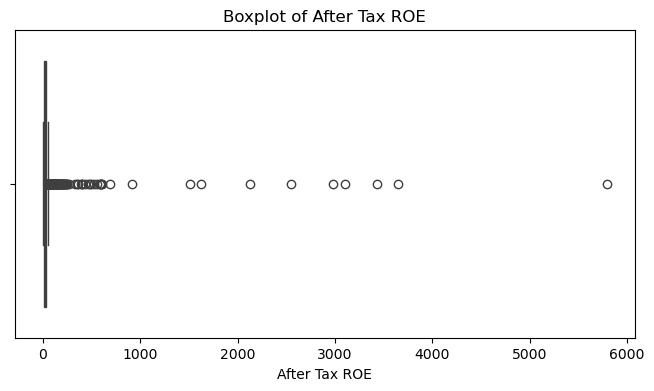

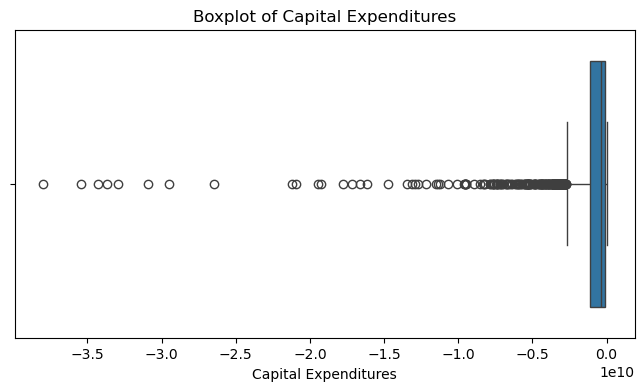

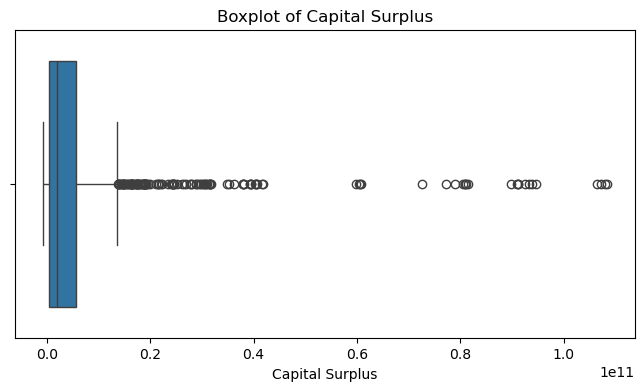

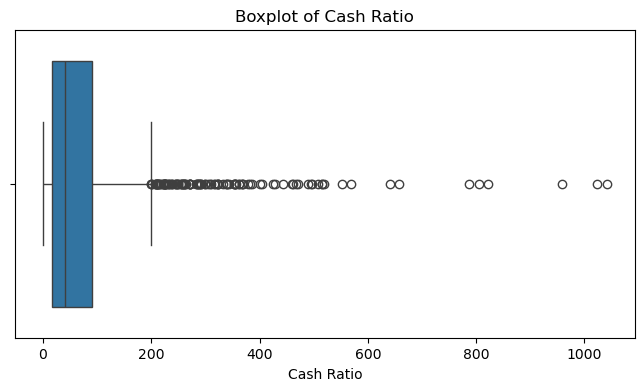

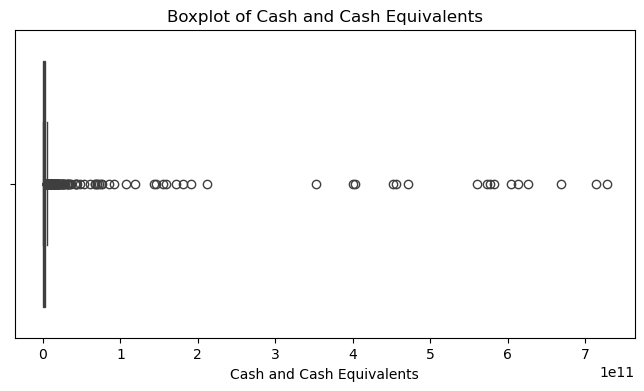

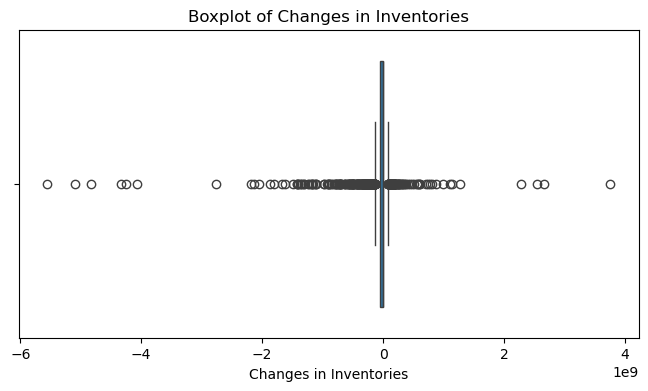

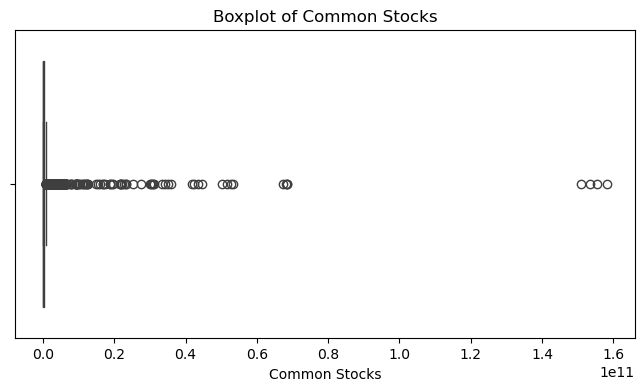

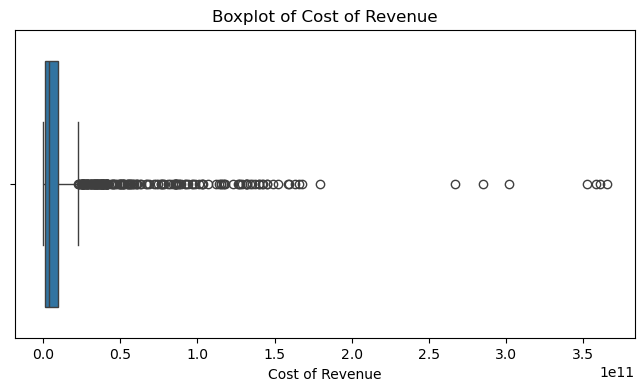

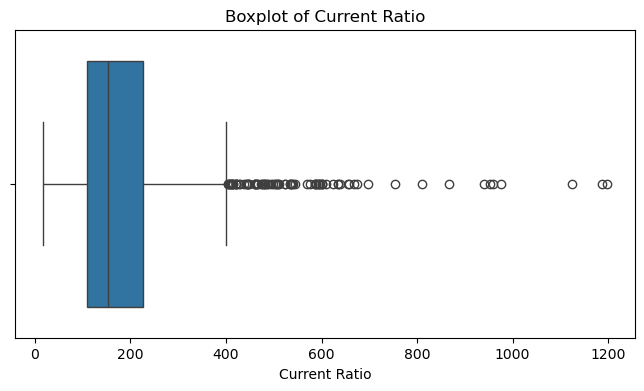

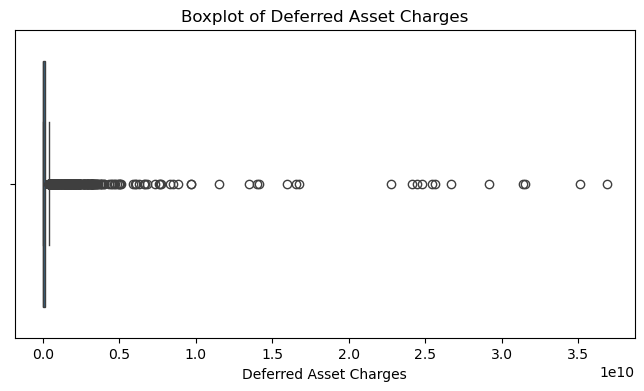

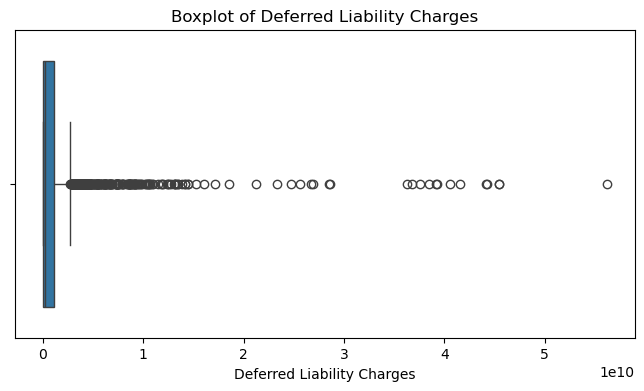

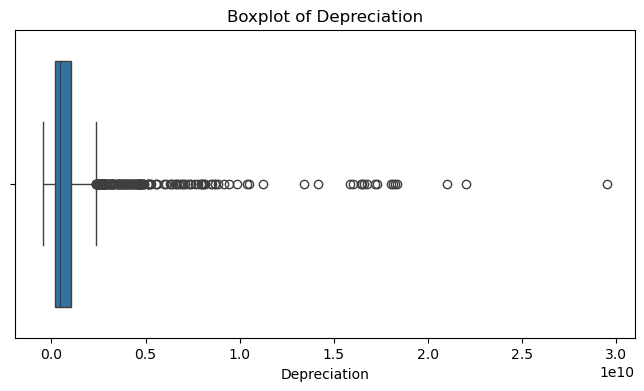

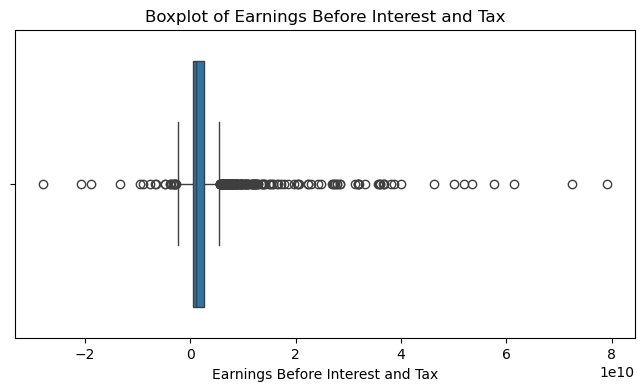

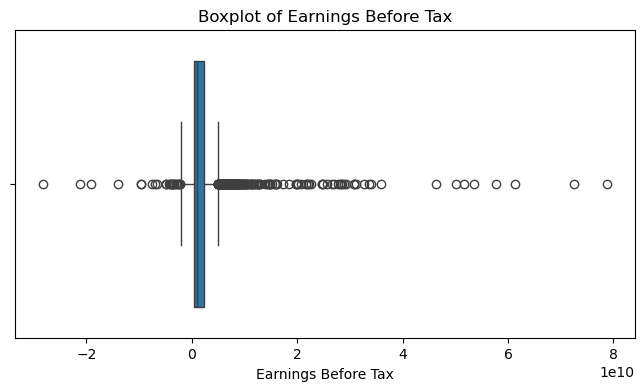

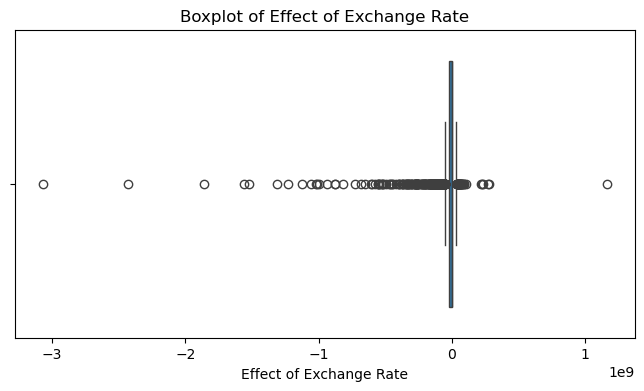

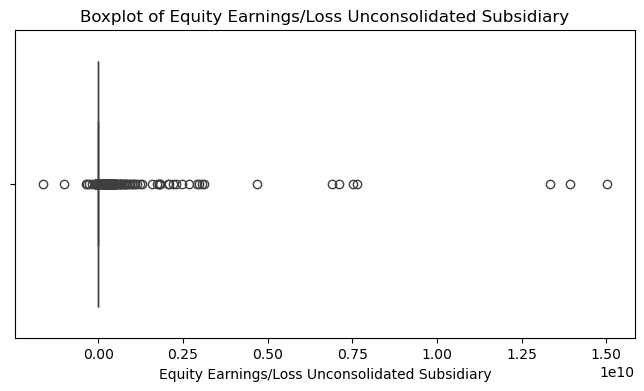

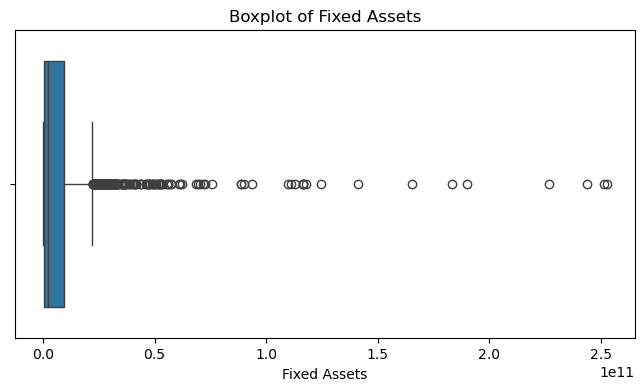

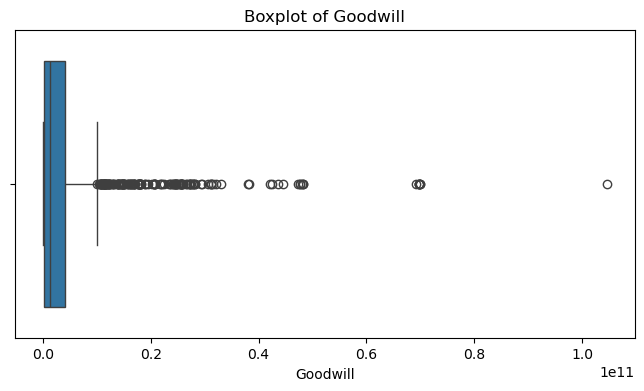

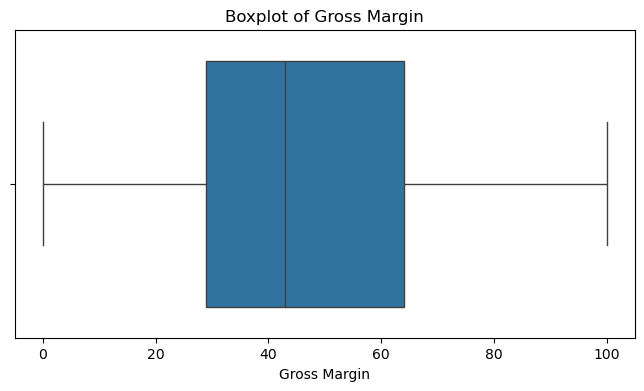

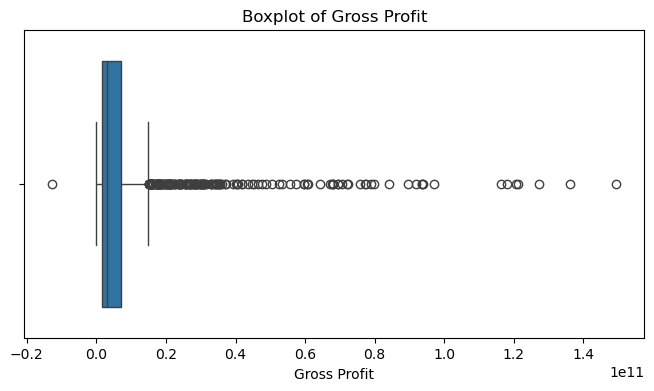

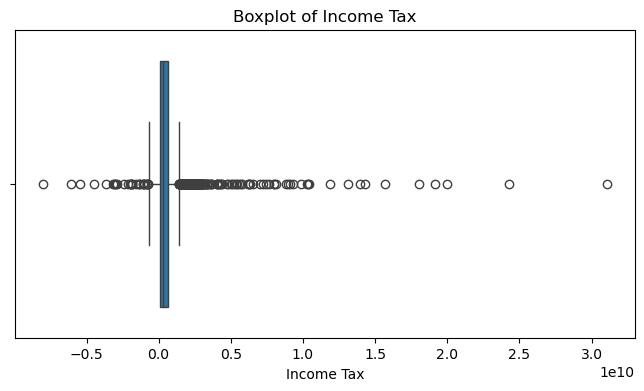

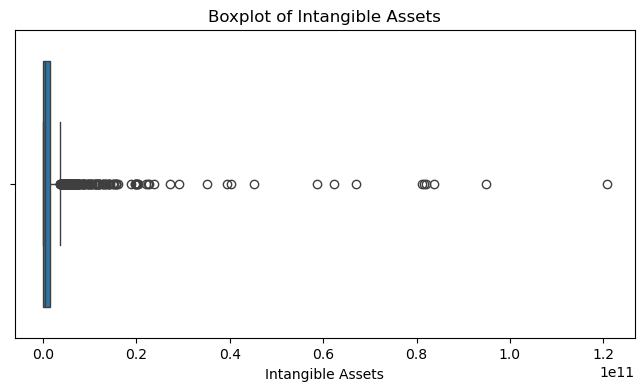

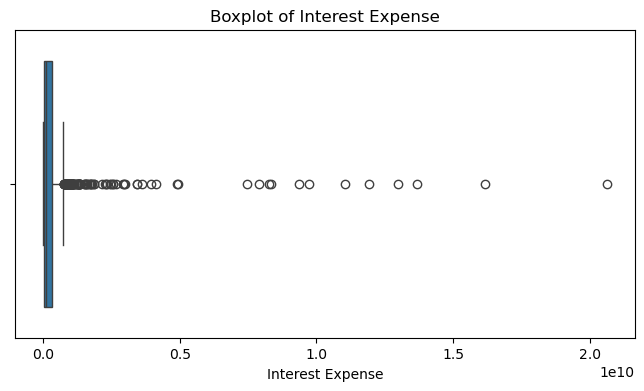

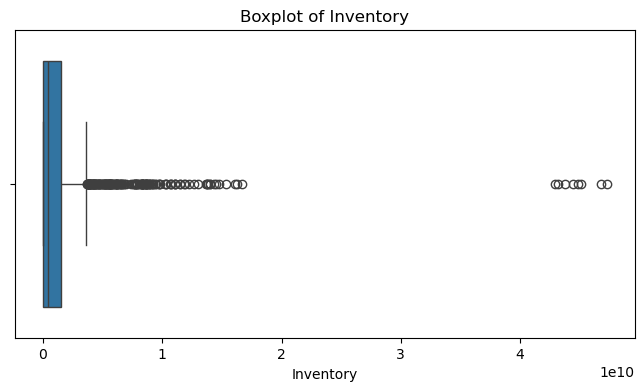

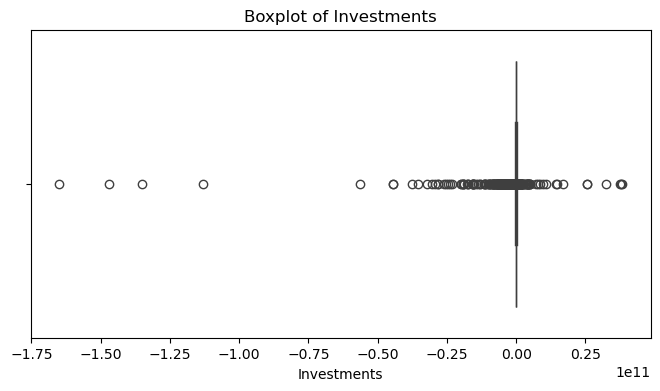

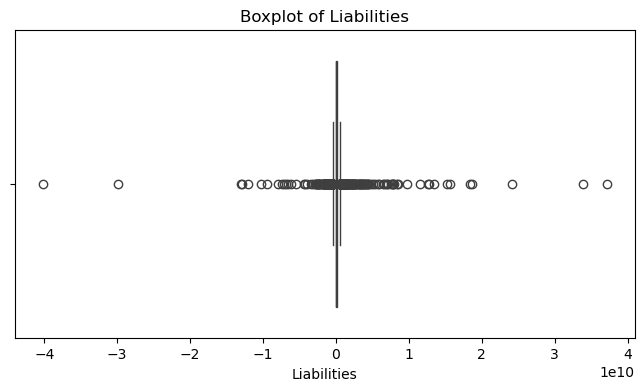

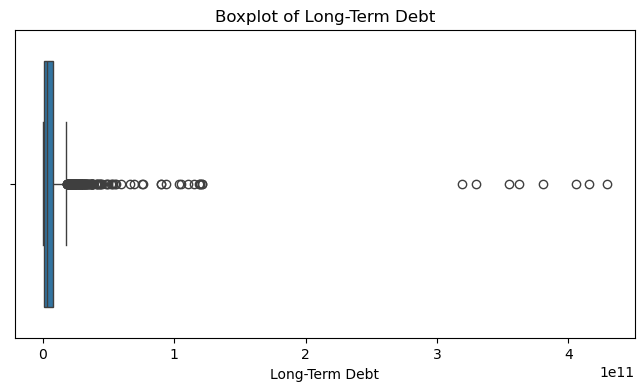

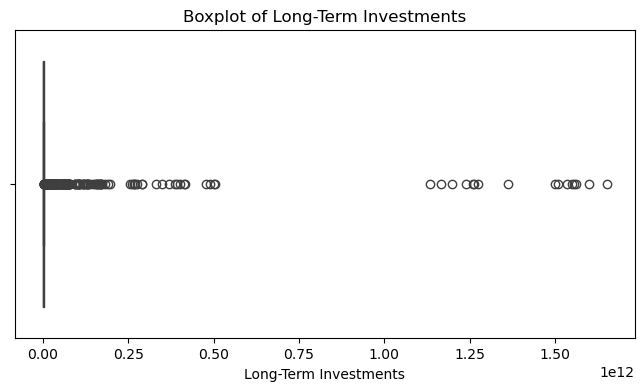

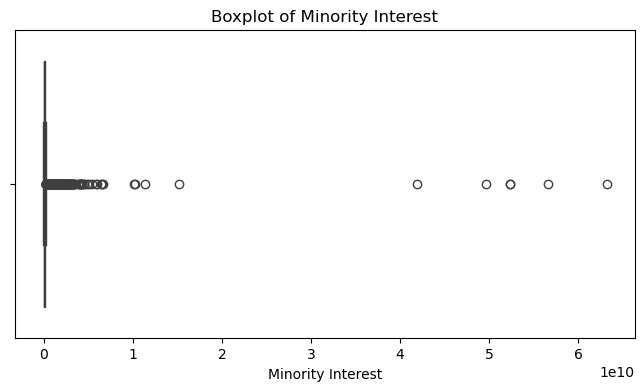

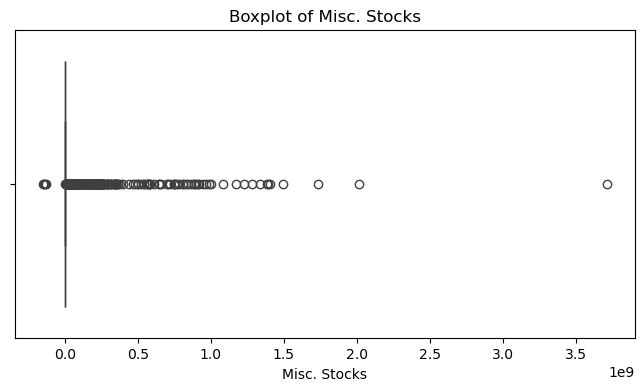

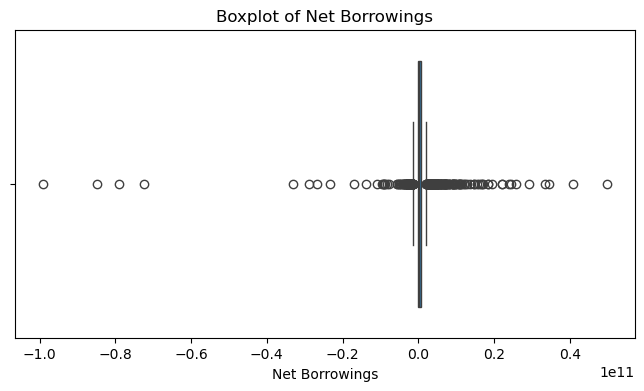

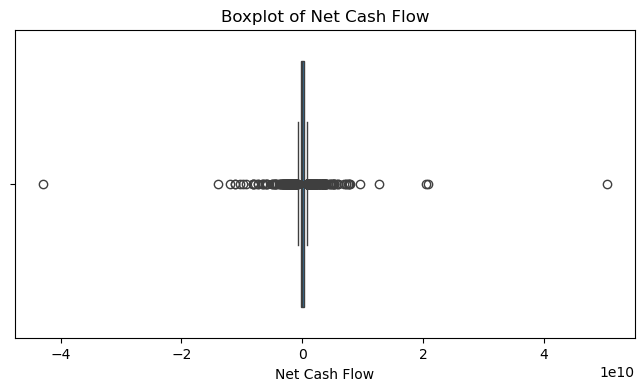

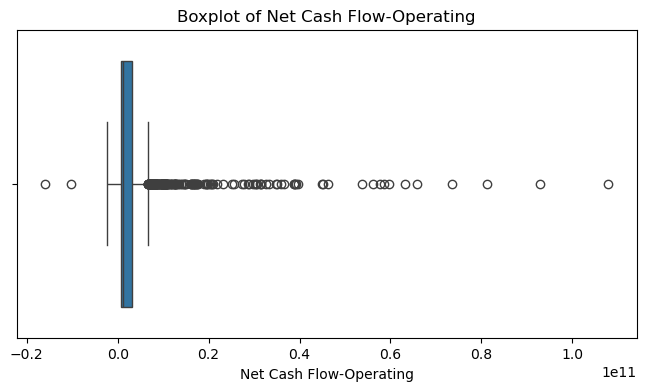

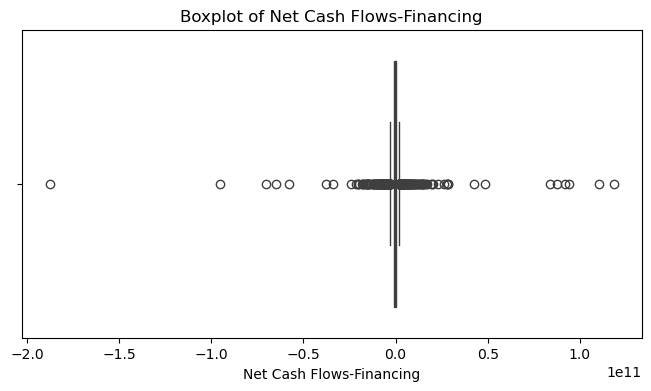

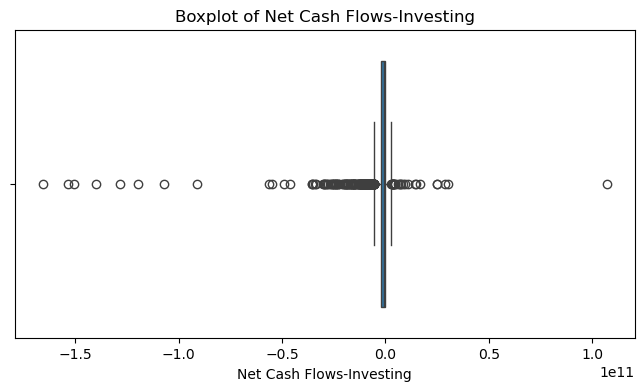

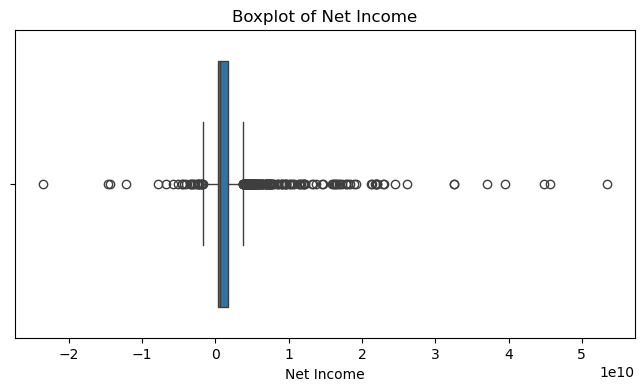

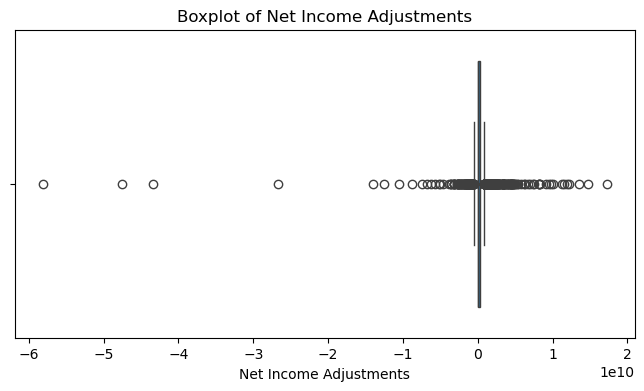

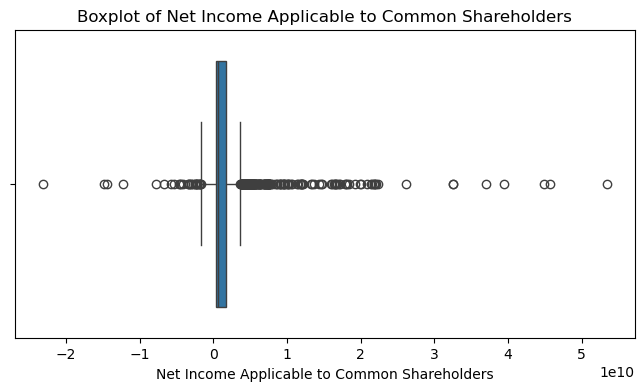

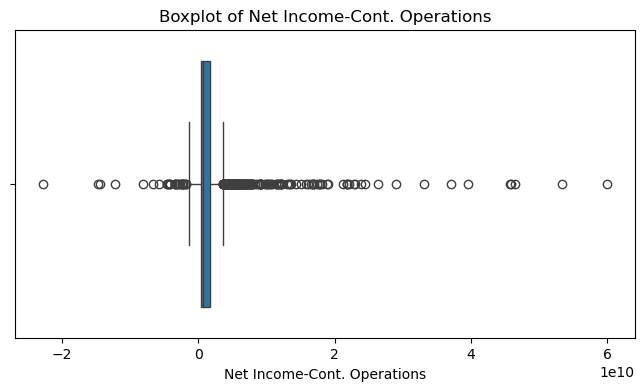

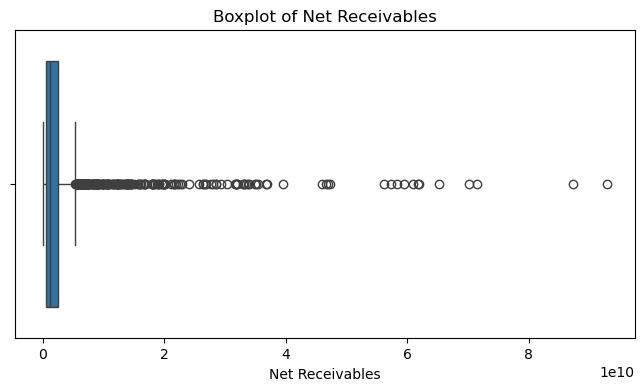

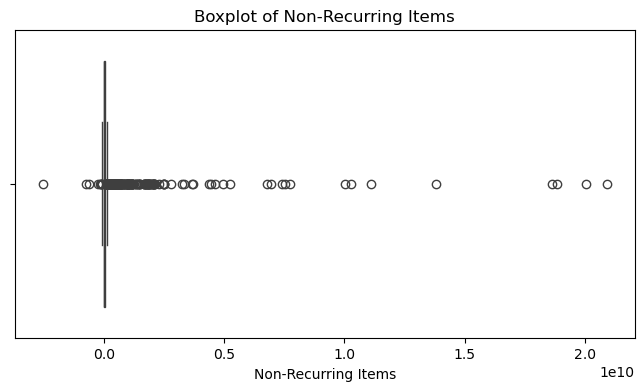

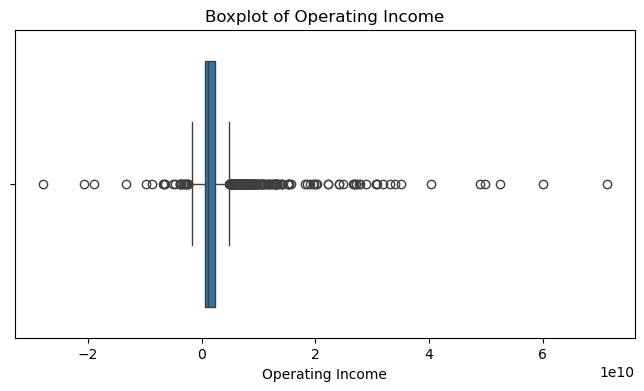

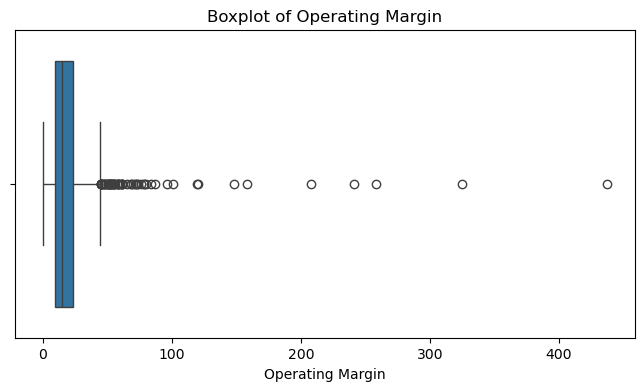

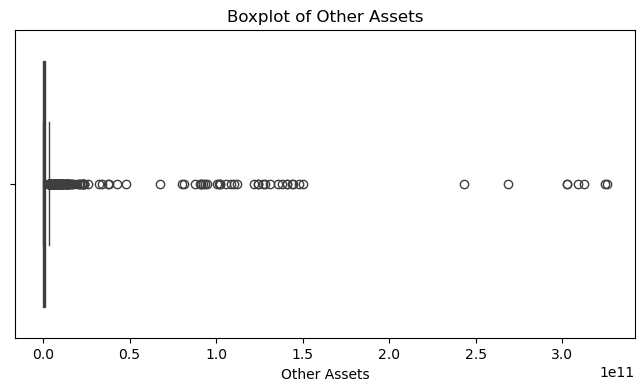

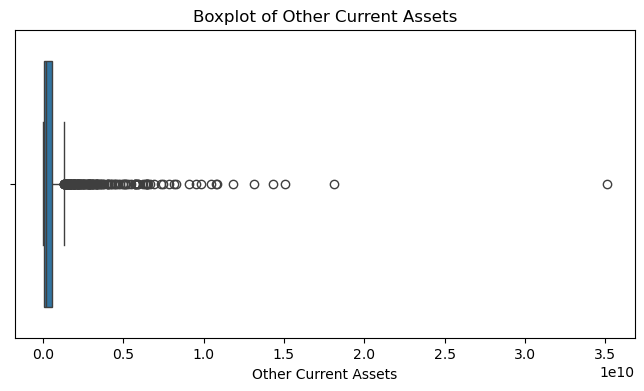

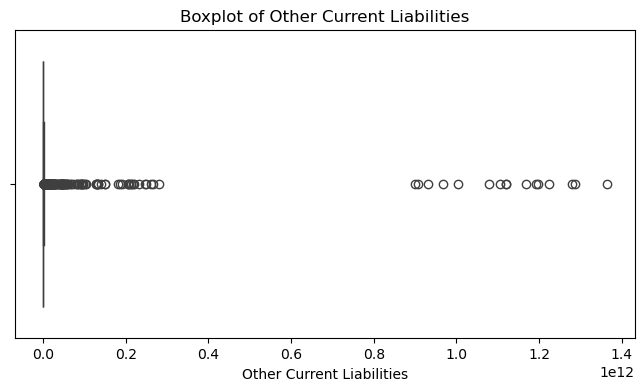

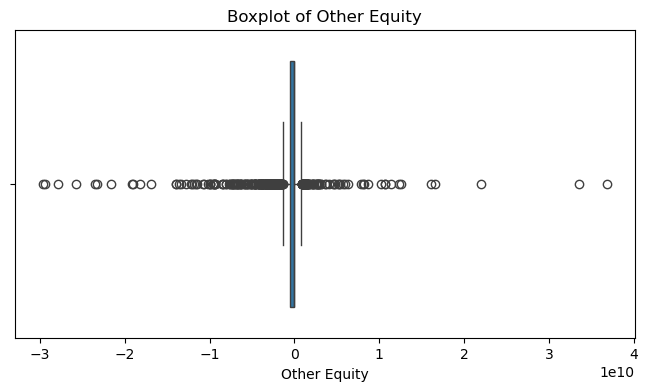

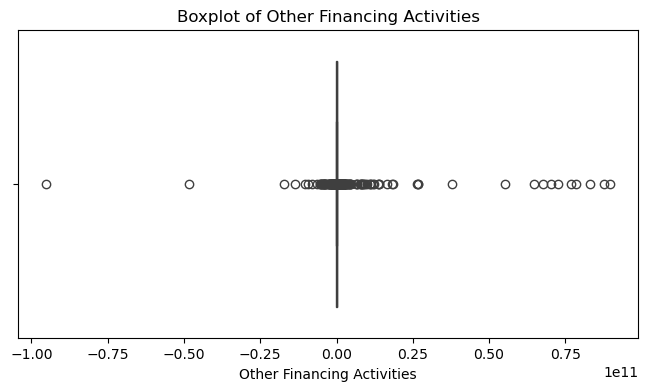

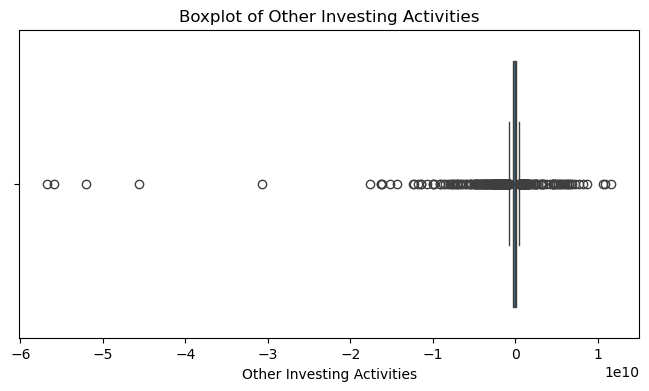

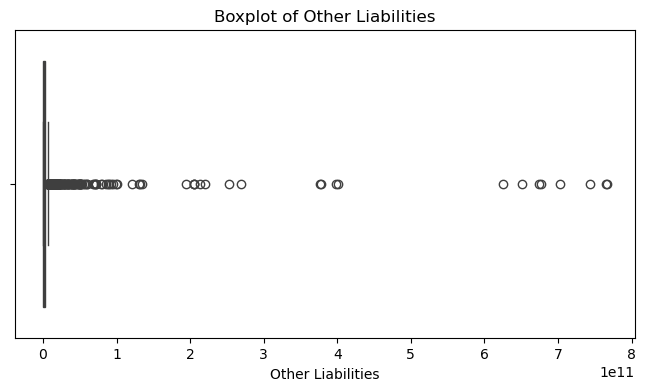

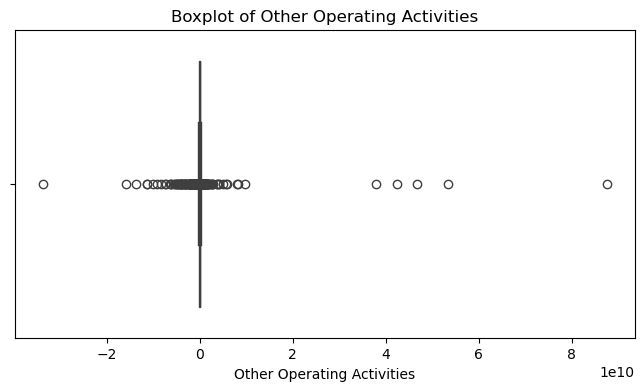

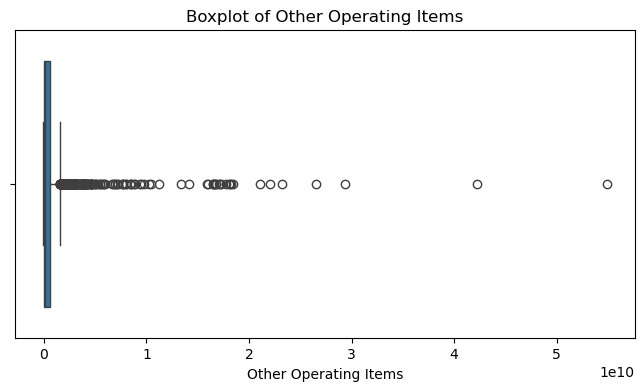

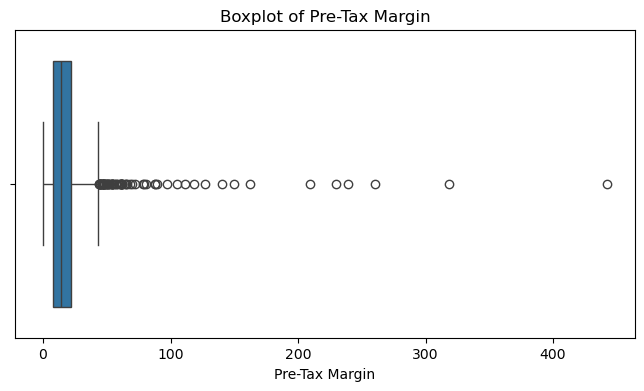

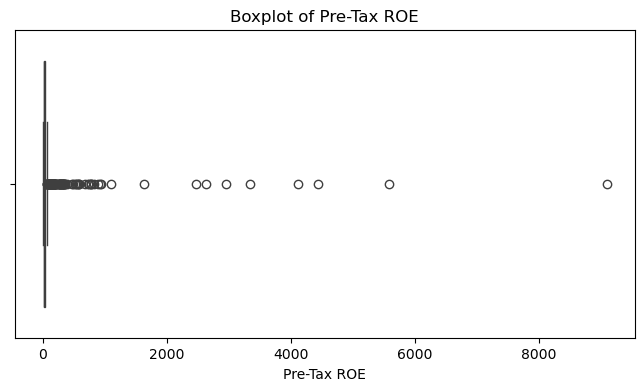

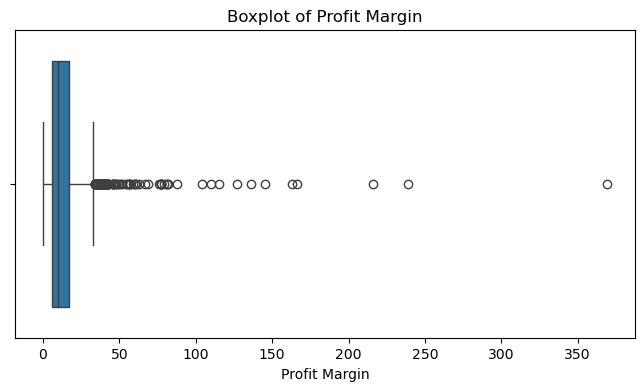

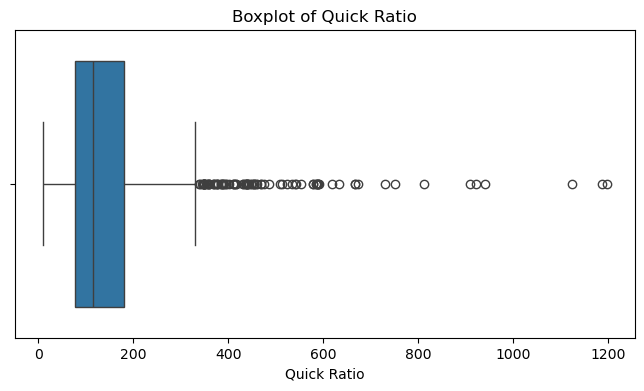

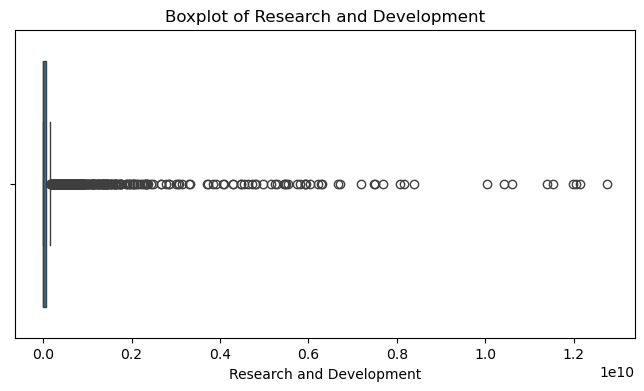

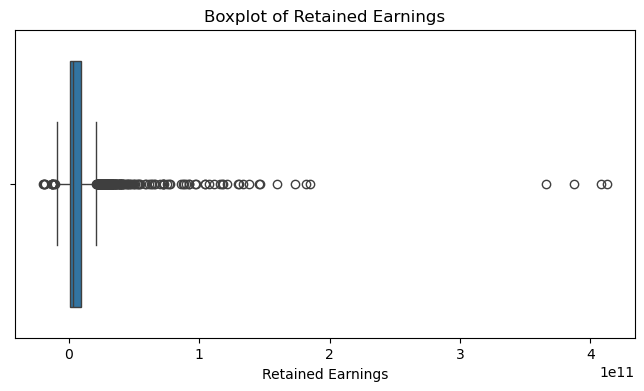

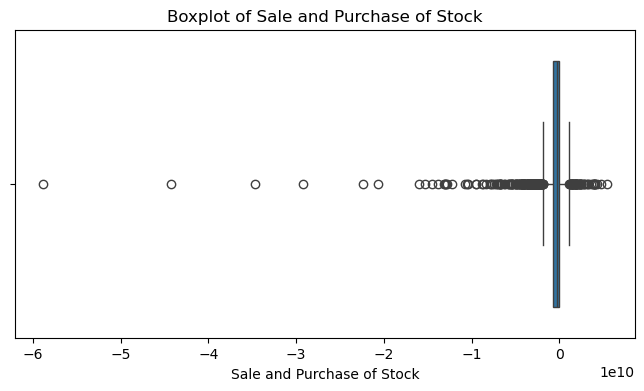

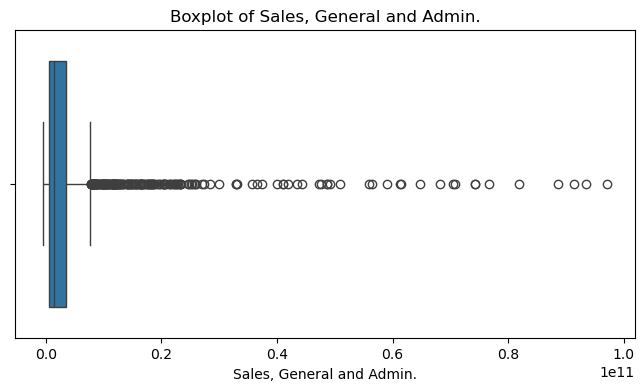

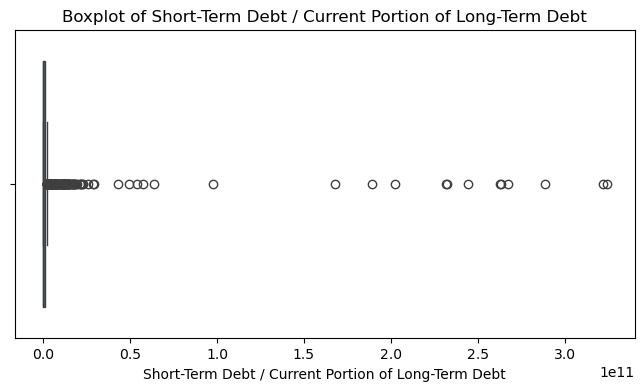

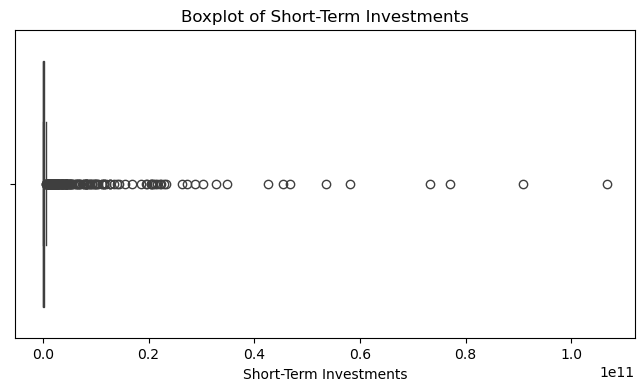

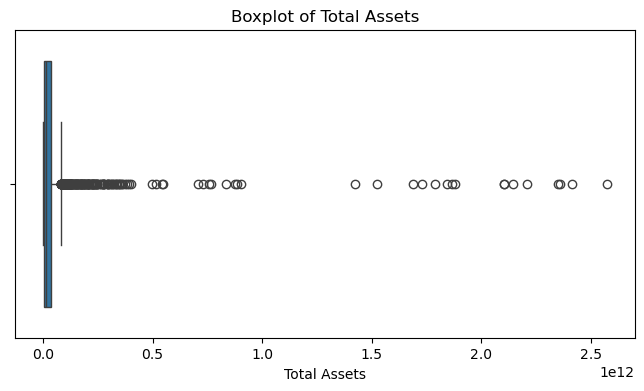

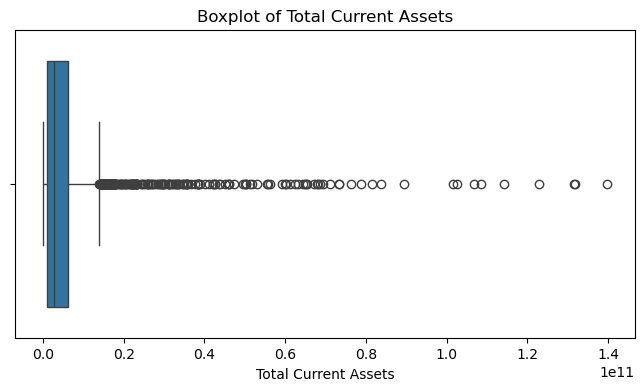

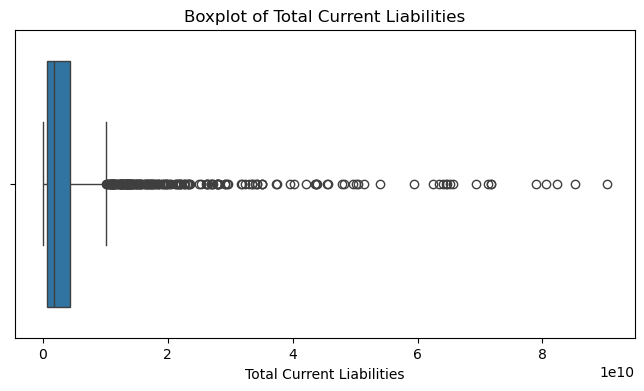

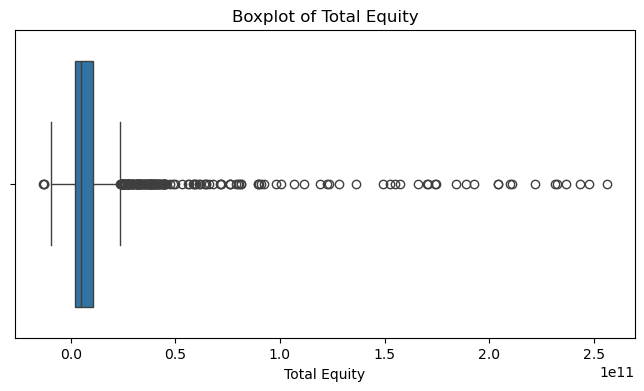

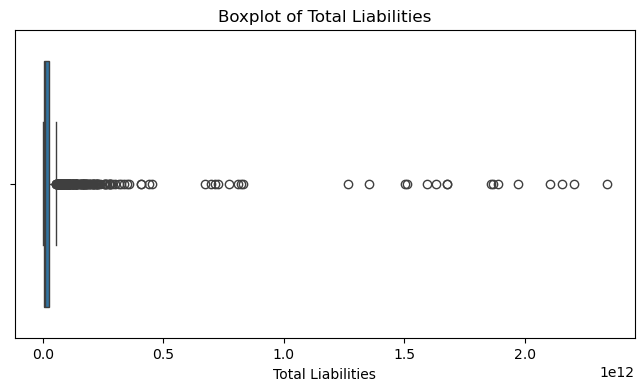

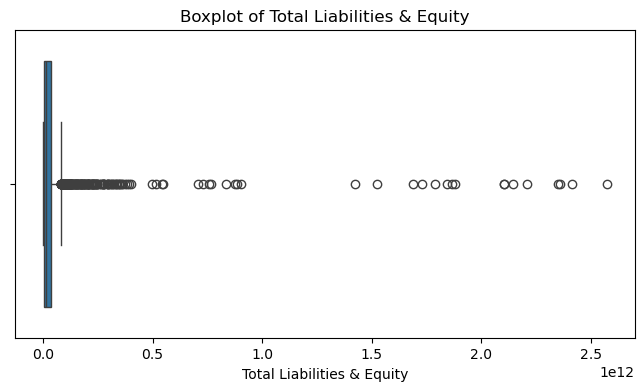

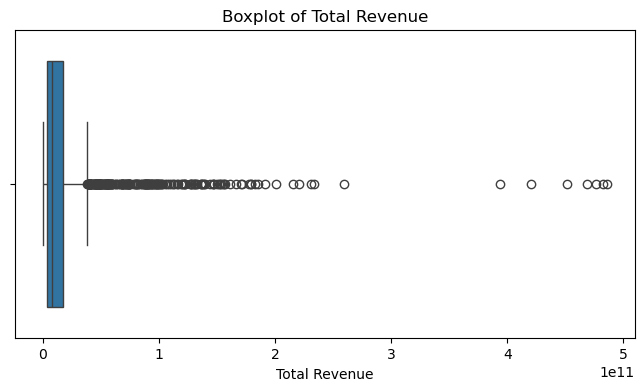

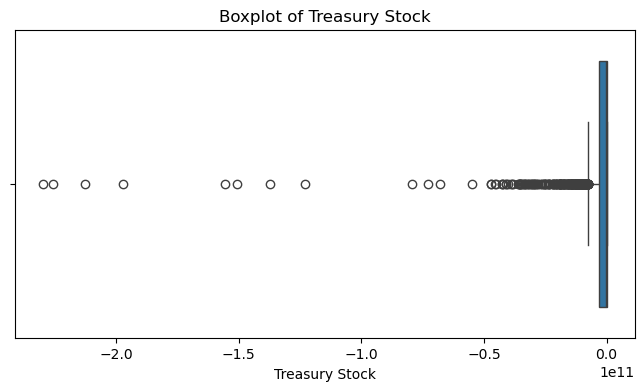

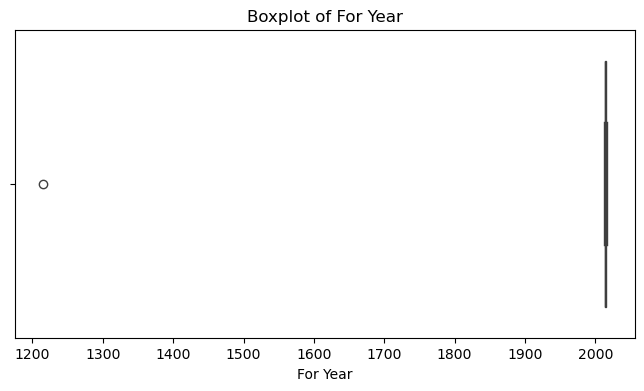

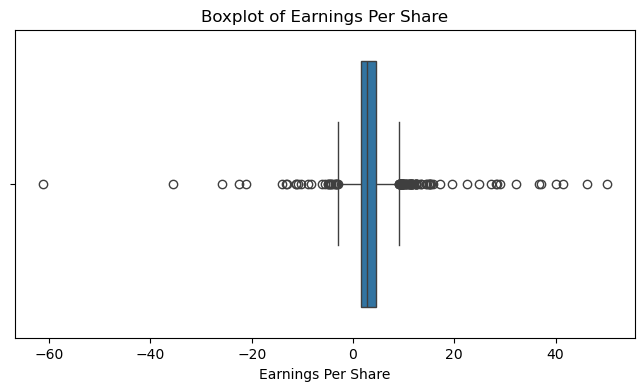

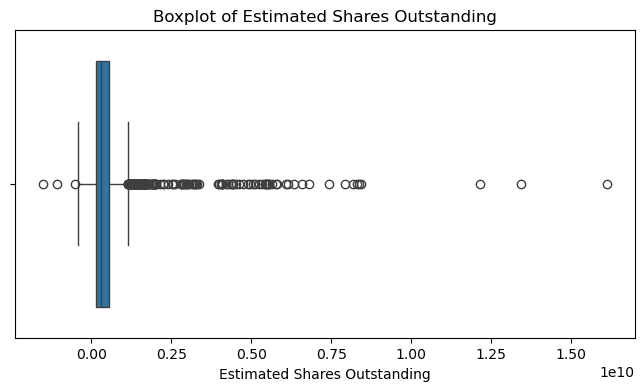

In [10]:
# Box plot for detecting outliers
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


# Feature Selection

## Correlation Matrix for ROE and all Financial Metrics


After Tax ROE                                          1.000000
Pre-Tax ROE                                            0.987914
Operating Margin                                       0.124357
Profit Margin                                          0.114109
Pre-Tax Margin                                         0.111432
Misc. Stocks                                           0.061325
Gross Margin                                           0.027665
Changes in Inventories                                 0.025754
Non-Recurring Items                                    0.021281
Capital Expenditures                                   0.020522
Net Cash Flows-Investing                               0.018905
Cash Ratio                                             0.015120
Investments                                            0.013421
Effect of Exchange Rate                                0.013203
Net Borrowings                                         0.011674
Accounts Receivable                     

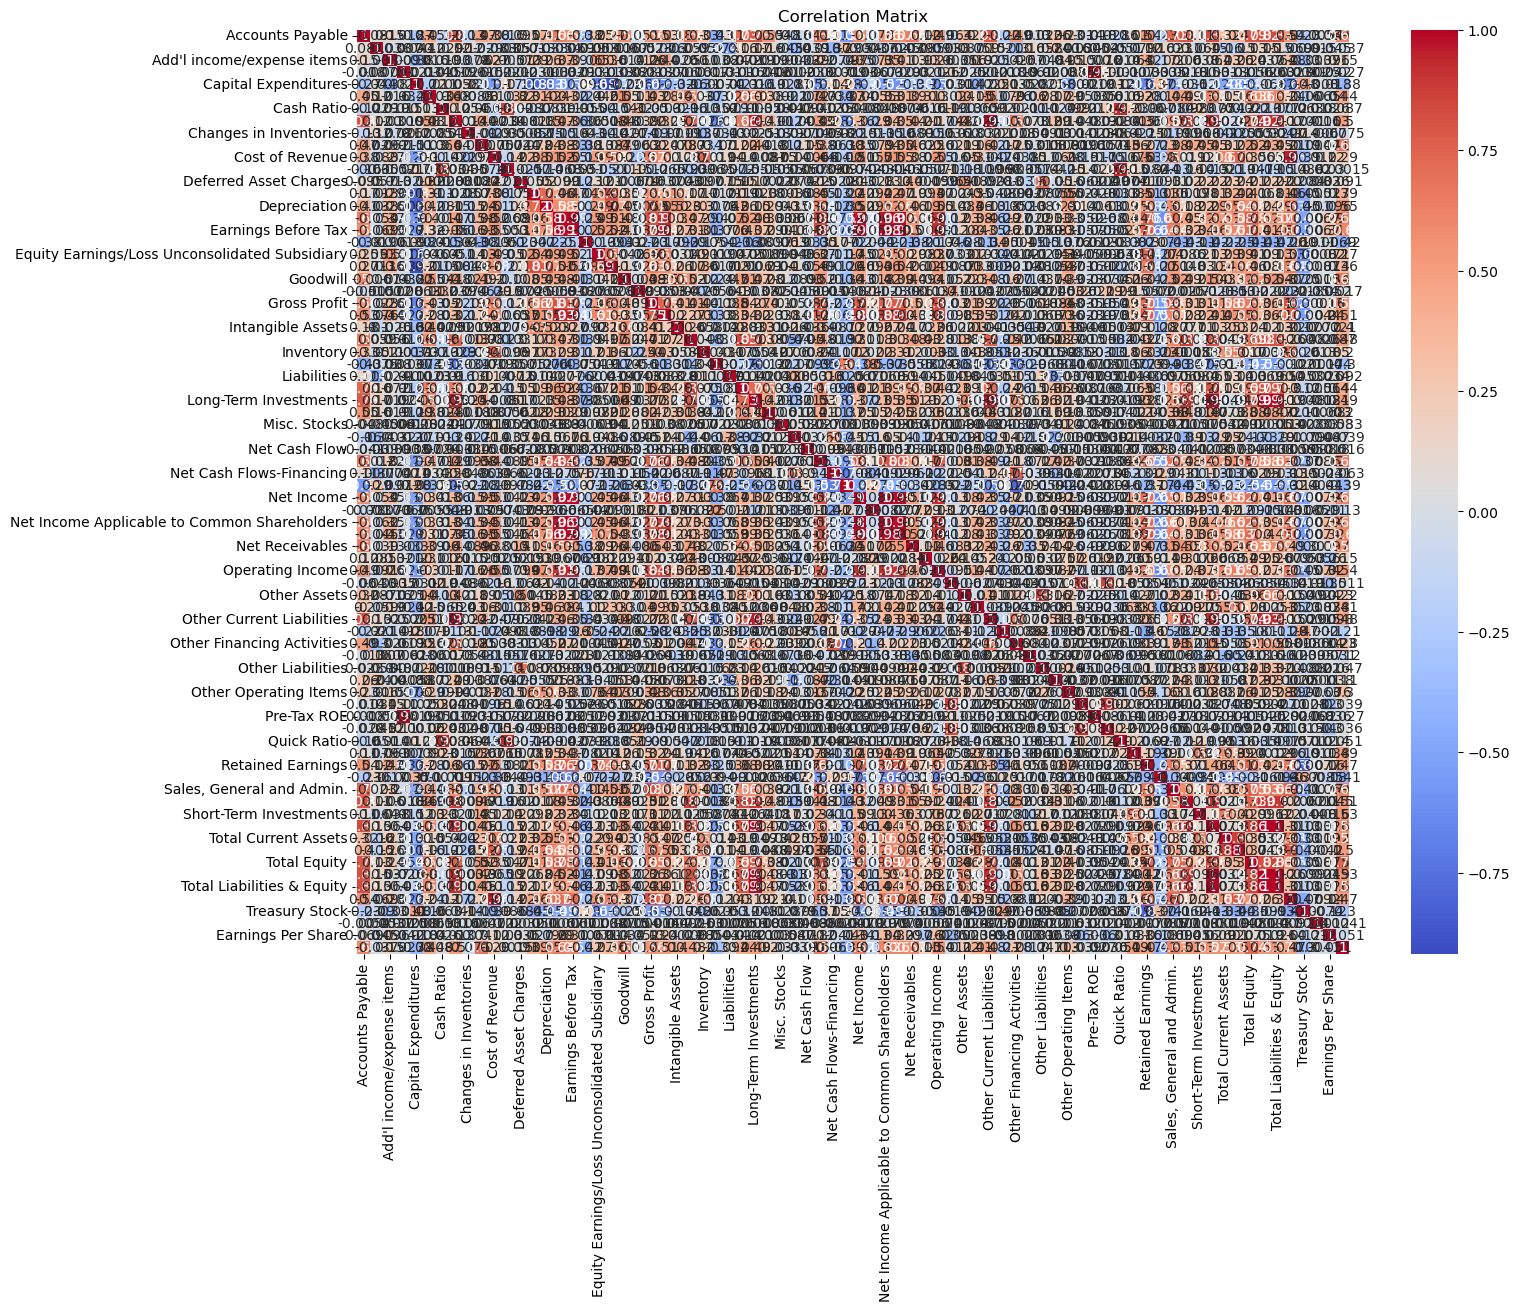

In [16]:
# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Increase the number of rows displayed by Pandas
pd.set_option('display.max_rows', None)

# Display correlation with ROE
correlation_with_roe = corr_matrix['After Tax ROE'].sort_values(ascending=False)
print(correlation_with_roe)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation Matrix for ROE and domain-knowledge selected Financial Metrics


Selected data after dropping missing values:
   Accounts Payable  Accounts Receivable  Add'l income/expense items  \
0      3.068000e+09         -222000000.0               -1.961000e+09   
1      4.975000e+09          -93000000.0               -2.723000e+09   
2      4.668000e+09         -160000000.0               -1.500000e+08   
3      5.102000e+09          352000000.0               -7.080000e+08   
4      2.409453e+09          -89482000.0                6.000000e+05   

   Capital Expenditures  Capital Surplus  Cash Ratio  After Tax ROE  
0         -1.888000e+09     4.695000e+09        53.0           23.0  
1         -3.114000e+09     1.059200e+10        75.0           67.0  
2         -5.311000e+09     1.513500e+10        60.0          143.0  
3         -6.151000e+09     1.159100e+10        51.0          135.0  
4         -2.711820e+08     5.202150e+08        23.0           32.0  

Correlation matrix:
                            Accounts Payable  Accounts Receivable  \
Accounts Pa

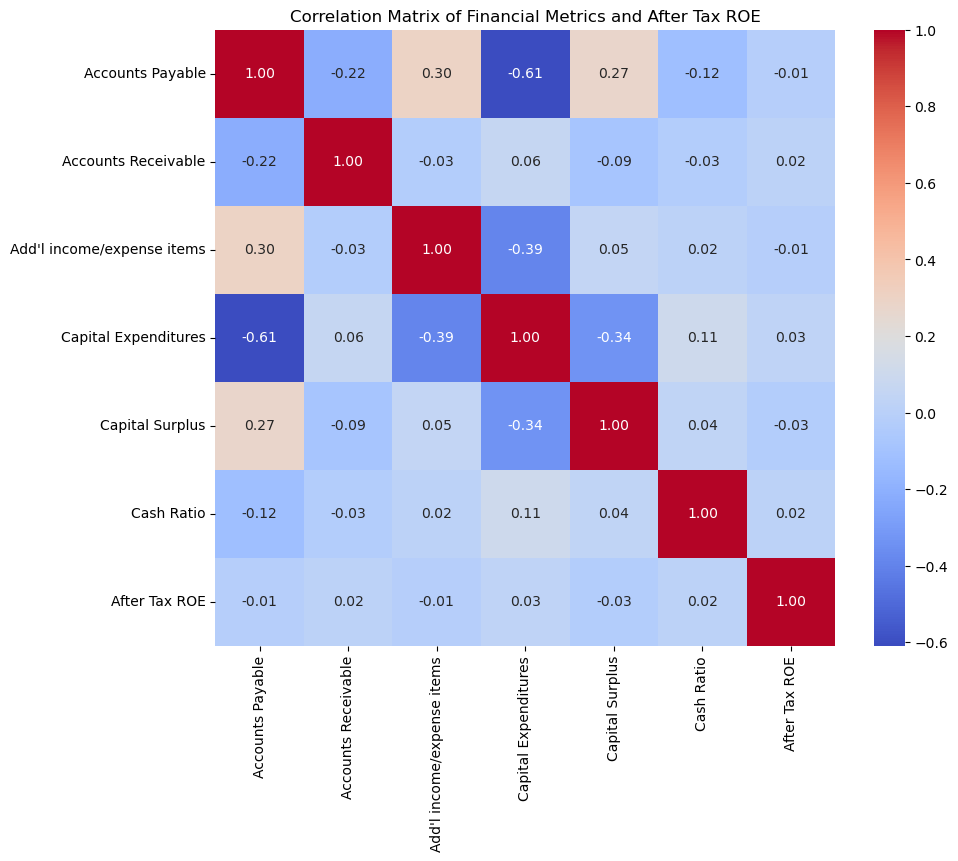

In [17]:
# Define the columns we need
columns_needed = [
    'Accounts Payable',
    'Accounts Receivable',
    "Add'l income/expense items",  # Corrected column name
    'Capital Expenditures',
    'Capital Surplus',
    'Cash Ratio',
    'After Tax ROE'  # This column exists in your dataset
]

# Create a new DataFrame with the selected columns
df_selected = df[columns_needed]

# Handle missing values by dropping rows with any missing data
df_selected = df_selected.dropna()

# Display the first few rows of the selected data
print("\nSelected data after dropping missing values:")
print(df_selected.head())

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Metrics and After Tax ROE')
plt.show()
